In [2]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader
from dl_utils.utils.dataset import viz_dataloader, split_train_valid, hdf5_dataset
from dl_utils.training.build_model import xcit_small
from dl_utils.training.trainer import Trainer, accuracy
from dl_utils.packed_functions import benchmark_task

ds_path_info = {'imagenet': '../../datasets/imagenet_v5_rot_10m_fix_vector.h5',
                'noise': '../../datasets/noise_v5_rot_1m_fix_vector.h5',
                'atom': '../../datasets/atom_v5_rot_1m_fix_vector.h5',
                'viz_dataloader': False}

training_specs = {'batch_size': 400, 
                  'num_workers': 12, 
                  'device_ids': [7,8,9], 
                  'shuffle': True,
                  'learning_rate': 1e-3,
                  'validation_times': 200,
                  'training_image_count': 10000000*20, # 20 epochs of 10 million images of full imagenet dataset
                  'efficient_print': True,
                  'model_path': '../../models/XCiT/'
                  }

config = {'loss_func': 'CrossEntropyLoss', # nn.MSELoss()
          'optimizer': 'Adam',
          'scheduler': 'OneCycleLR'}
    
wandb_specs = {'config': config,
                'project': 'Understanding-Experimental-Images-by-Identifying-Symmetries-with-Deep-Learning',
                'entity': 'yig319',
                'group': 'test',
                'save_code': True,
                'resume': 'allow'}

model = xcit_small(in_channels=3, n_classes=17)
task_name = '03132025-XCiT-benchmark'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### full size dataset - 10 million

In [ ]:
training_specs['ds_size'] = 10000000
training_specs['epoch_start'] = 20
training_specs['folder_name'] = '09302024-XCiT-dataset_v5_size-10m'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yig319 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


[20, 21, 22, 23]
Epoch: 21/24


Train: 100%|██████████| 27129/27129 [10:48:30<00:00,  1.43s/it] 


train_loss: 0.0348, train_accuracy: 98.73%


Valid: 100%|██████████| 6783/6783 [1:01:01<00:00,  1.85it/s]


valid_loss: 0.0365, valid_accuracy: 98.67%
Model saved at epoch 20
Saved new best model at epoch 20 with valid dataset


Valid: 100%|██████████| 3338/3338 [29:48<00:00,  1.87it/s]


noise_loss: 0.0926, noise_accuracy: 96.82%


Valid: 100%|██████████| 3338/3338 [29:50<00:00,  1.86it/s]


atom_loss: 0.7394, atom_accuracy: 88.34%
Model saved at epoch 21
Epoch: 22/24


Train: 100%|██████████| 27129/27129 [10:42:44<00:00,  1.42s/it] 


train_loss: 0.0361, train_accuracy: 98.68%


Valid: 100%|██████████| 6783/6783 [1:00:51<00:00,  1.86it/s]


valid_loss: 0.0355, valid_accuracy: 98.69%
Model saved at epoch 21
Saved new best model at epoch 21 with valid dataset


Valid: 100%|██████████| 3338/3338 [29:58<00:00,  1.86it/s]


noise_loss: 0.0571, noise_accuracy: 97.89%


Valid: 100%|██████████| 3338/3338 [29:54<00:00,  1.86it/s]


atom_loss: 0.5011, atom_accuracy: 88.04%
Model saved at epoch 22
Epoch: 23/24


Train: 100%|██████████| 27129/27129 [11:02:05<00:00,  1.46s/it]  


train_loss: 0.0343, train_accuracy: 98.73%


Valid: 100%|██████████| 6783/6783 [1:05:07<00:00,  1.74it/s]


valid_loss: 0.0338, valid_accuracy: 98.74%
Model saved at epoch 22
Saved new best model at epoch 22 with valid dataset


Valid: 100%|██████████| 3338/3338 [31:50<00:00,  1.75it/s]


noise_loss: 0.0293, noise_accuracy: 98.93%


Valid: 100%|██████████| 3338/3338 [32:18<00:00,  1.72it/s]


atom_loss: 0.4497, atom_accuracy: 91.38%
Model saved at epoch 23
Epoch: 24/24


Train: 100%|██████████| 27129/27129 [11:04:44<00:00,  1.47s/it]  


train_loss: 0.0327, train_accuracy: 98.78%


Valid: 100%|██████████| 6783/6783 [1:04:08<00:00,  1.76it/s]


valid_loss: 0.0333, valid_accuracy: 98.76%
Model saved at epoch 23
Saved new best model at epoch 23 with valid dataset


Valid: 100%|██████████| 3338/3338 [31:56<00:00,  1.74it/s]


noise_loss: 0.0258, noise_accuracy: 99.14%


Valid: 100%|██████████| 3338/3338 [31:34<00:00,  1.76it/s]


atom_loss: 0.4332, atom_accuracy: 93.00%
Model saved at epoch 24


atom_accuracy,▄▃▅▄▅▂▂▆▂▄▆▅▃▅▁▃▂▃▃▆▃▄▃▇▆▆▅▅▆▇█▇▇▇▇██▄▆▆
atom_loss,▅▃▅▄▅▆▆▆█▅▃▃▃▂▃▃▃▅▂▄▁▃▂▂▂▄▃▂▂▂▂▃▄▂▁▂▄▃▂▂
epoch,▁▁▁▁▃▃▃▃▆▆▆▆████
noise_accuracy,▃▂▃▂▂▁▅▃▆▅█▆▆▇▆▄▆▆▆▇▆▇▇▇█▇▆█▇▇▇▇▇▇▇▆▇▇██
noise_loss,▇█▇▄▆▇▅▃▄▄▆▄▅▃▂▃▄▁▂▄▂▂▃▃▂▁▂▂▅▂▃▂▁▂▂▁▃▁▂▂
records,▁▂▂▂▂▂▃▁▁▁▁▁▁▁▁▃▃▃▃▄▅▃▃▃▃▅▅▆▆▆▆▆▅▅▇▇███▇
train_accuracy,▆▃▆▂▅▇▇▅▇▁▃▃▅▃▂▄▅▃▅▆▃▄▃▇▅▇▄▄▅▇▃▃▁▄▂▅▅█▇▆
train_loss,▅▃▄▄▆▄▅▃▆▃▃▅▇▃▅█▇▂█▄▃▅▅▃▂▁▄▆▅▃▅▄▃▃▄▆▃▅▄█
valid_accuracy,▅▄▃▇▆▅▄▃▅▅▂▁▂▅▅▃▄▅█▄▂█▇▇▅▇▆▅▅▆▅▃▇▄▄▅▅▅▅▅
valid_loss,▂▅▄▅▁█▄▄▆▅▄▅▄▄▆▇▃▄▄▃▄▂▁▄▃▆▅▅▂▅▄▄▇▃▃▄▃▄▃▂
atom_accuracy,0.93003


defaultdict(<class 'list'>, {'train_loss': [0.034792974628639, 0.03609113489197251, 0.03430143872748689, 0.03271151289179862], 'train_accuracy': [0.9872618837274282, 0.9867672019861976, 0.98731127817849, 0.9878275853510311], 'valid_loss': [0.03647549537264571, 0.03550614364434895, 0.033811096085489996, 0.03329181832264848], 'valid_accuracy': [0.9866821779949495, 0.9869053130722751, 0.9873879532615566, 0.9876233755127438], 'noise_loss': [0.09260001674188066, 0.057055261161788134, 0.029295028345895625, 0.025848453834400934], 'noise_accuracy': [0.9681783681214421, 0.9789313891940478, 0.9893388594826725, 0.9913712174173575], 'atom_loss': [0.7393912541828205, 0.5010584704656053, 0.44972632023988873, 0.4332164894935671], 'atom_accuracy': [0.8833746130030959, 0.8804294417257565, 0.9138499950064916, 0.9300339558573854]})
8


TypeError: 'numpy.float64' object cannot be interpreted as an integer

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yig319 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Epoch: 1/24


Train: 100%|██████████| 20347/20347 [10:09:13<00:00,  1.80s/it] 


train_loss: 0.2481, train_accuracy: 91.41%


Valid: 100%|██████████| 5087/5087 [55:52<00:00,  1.52it/s] 


valid_loss: 0.0869, valid_accuracy: 97.01%
Model saved at epoch 0
Saved new best model at epoch 0 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:05<00:00,  1.49it/s]


noise_loss: 0.4792, noise_accuracy: 82.27%


Valid: 100%|██████████| 2504/2504 [28:13<00:00,  1.48it/s]


atom_loss: 0.6694, atom_accuracy: 80.51%
Model saved at epoch 1
Epoch: 2/24


Train: 100%|██████████| 20347/20347 [10:14:18<00:00,  1.81s/it] 


train_loss: 0.0708, train_accuracy: 97.56%


Valid: 100%|██████████| 5087/5087 [57:31<00:00,  1.47it/s] 


valid_loss: 0.0607, valid_accuracy: 97.90%
Model saved at epoch 1
Saved new best model at epoch 1 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:18<00:00,  1.47it/s]


noise_loss: 0.3040, noise_accuracy: 89.51%


Valid: 100%|██████████| 2504/2504 [28:17<00:00,  1.48it/s]


atom_loss: 0.7713, atom_accuracy: 81.87%
Model saved at epoch 2
Epoch: 3/24


Train: 100%|██████████| 20347/20347 [10:15:51<00:00,  1.82s/it] 


train_loss: 0.0564, train_accuracy: 98.03%


Valid: 100%|██████████| 5087/5087 [57:40<00:00,  1.47it/s] 


valid_loss: 0.0537, valid_accuracy: 98.13%
Model saved at epoch 2
Saved new best model at epoch 2 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:29<00:00,  1.46it/s]


noise_loss: 0.2570, noise_accuracy: 91.09%


Valid: 100%|██████████| 2504/2504 [28:13<00:00,  1.48it/s]


atom_loss: 0.5052, atom_accuracy: 87.00%
Model saved at epoch 3
Epoch: 4/24


Train: 100%|██████████| 20347/20347 [10:15:56<00:00,  1.82s/it] 


train_loss: 0.0483, train_accuracy: 98.29%


Valid: 100%|██████████| 5087/5087 [58:00<00:00,  1.46it/s] 


valid_loss: 0.0450, valid_accuracy: 98.41%
Model saved at epoch 3
Saved new best model at epoch 3 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:32<00:00,  1.46it/s]


noise_loss: 0.1868, noise_accuracy: 93.69%


Valid: 100%|██████████| 2504/2504 [28:35<00:00,  1.46it/s]


atom_loss: 0.5390, atom_accuracy: 87.85%
Model saved at epoch 4
Epoch: 5/24


Train: 100%|██████████| 20347/20347 [10:16:23<00:00,  1.82s/it] 


train_loss: 0.0431, train_accuracy: 98.46%


Valid: 100%|██████████| 5087/5087 [58:00<00:00,  1.46it/s] 


valid_loss: 0.0437, valid_accuracy: 98.45%
Model saved at epoch 4
Saved new best model at epoch 4 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:33<00:00,  1.46it/s]


noise_loss: 0.1259, noise_accuracy: 95.44%


Valid: 100%|██████████| 2504/2504 [28:44<00:00,  1.45it/s]


atom_loss: 0.5185, atom_accuracy: 90.62%
Model saved at epoch 5
Epoch: 6/24


Train: 100%|██████████| 20347/20347 [10:17:54<00:00,  1.82s/it] 


train_loss: 0.0402, train_accuracy: 98.54%


Valid: 100%|██████████| 5087/5087 [58:14<00:00,  1.46it/s] 


valid_loss: 0.0394, valid_accuracy: 98.57%
Model saved at epoch 5
Saved new best model at epoch 5 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:49<00:00,  1.45it/s]


noise_loss: 0.1056, noise_accuracy: 96.11%


Valid: 100%|██████████| 2504/2504 [28:40<00:00,  1.46it/s]


atom_loss: 0.4794, atom_accuracy: 89.22%
Model saved at epoch 6
Epoch: 7/24


Train: 100%|██████████| 20347/20347 [10:18:00<00:00,  1.82s/it] 


train_loss: 0.0398, train_accuracy: 98.57%


Valid: 100%|██████████| 5087/5087 [58:12<00:00,  1.46it/s] 


valid_loss: 0.0383, valid_accuracy: 98.60%
Model saved at epoch 6
Saved new best model at epoch 6 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:38<00:00,  1.46it/s]


noise_loss: 0.1083, noise_accuracy: 96.57%


Valid: 100%|██████████| 2504/2504 [28:40<00:00,  1.46it/s]


atom_loss: 0.3213, atom_accuracy: 92.49%
Model saved at epoch 7
Epoch: 8/24


Train: 100%|██████████| 20347/20347 [10:16:49<00:00,  1.82s/it] 


train_loss: 0.0372, train_accuracy: 98.64%


Valid: 100%|██████████| 5087/5087 [58:13<00:00,  1.46it/s] 


valid_loss: 0.0376, valid_accuracy: 98.62%
Model saved at epoch 7
Saved new best model at epoch 7 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:47<00:00,  1.45it/s]


noise_loss: 0.0629, noise_accuracy: 97.79%


Valid: 100%|██████████| 2504/2504 [28:46<00:00,  1.45it/s]


atom_loss: 0.6353, atom_accuracy: 90.34%
Model saved at epoch 8
Epoch: 9/24


Train: 100%|██████████| 20347/20347 [10:17:58<00:00,  1.82s/it] 


train_loss: 0.0363, train_accuracy: 98.67%


Valid: 100%|██████████| 5087/5087 [58:08<00:00,  1.46it/s] 


valid_loss: 0.0358, valid_accuracy: 98.68%
Model saved at epoch 8
Saved new best model at epoch 8 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:50<00:00,  1.45it/s]


noise_loss: 0.0577, noise_accuracy: 97.88%


Valid: 100%|██████████| 2504/2504 [28:55<00:00,  1.44it/s]


atom_loss: 0.6471, atom_accuracy: 88.37%
Model saved at epoch 9
Epoch: 10/24


Train: 100%|██████████| 20347/20347 [10:18:16<00:00,  1.82s/it] 


train_loss: 0.0357, train_accuracy: 98.69%


Valid: 100%|██████████| 5087/5087 [58:04<00:00,  1.46it/s] 


valid_loss: 0.0362, valid_accuracy: 98.68%


Valid: 100%|██████████| 2504/2504 [28:51<00:00,  1.45it/s]


noise_loss: 0.0720, noise_accuracy: 97.54%


Valid: 100%|██████████| 2504/2504 [28:45<00:00,  1.45it/s]


atom_loss: 0.4099, atom_accuracy: 91.93%
Model saved at epoch 10
Epoch: 11/24


Train: 100%|██████████| 20347/20347 [10:19:17<00:00,  1.83s/it] 


train_loss: 0.0352, train_accuracy: 98.70%


Valid: 100%|██████████| 5087/5087 [58:27<00:00,  1.45it/s] 


valid_loss: 0.0352, valid_accuracy: 98.70%
Model saved at epoch 10
Saved new best model at epoch 10 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:32<00:00,  1.46it/s]


noise_loss: 0.0522, noise_accuracy: 98.04%


Valid: 100%|██████████| 2504/2504 [28:41<00:00,  1.45it/s]


atom_loss: 0.4466, atom_accuracy: 90.74%
Model saved at epoch 11
Epoch: 12/24


Train: 100%|██████████| 20347/20347 [10:18:15<00:00,  1.82s/it] 


train_loss: 0.0347, train_accuracy: 98.72%


Valid: 100%|██████████| 5087/5087 [58:22<00:00,  1.45it/s] 


valid_loss: 0.0353, valid_accuracy: 98.70%
Model saved at epoch 11
Saved new best model at epoch 11 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:54<00:00,  1.44it/s]


noise_loss: 0.0745, noise_accuracy: 97.39%


Valid: 100%|██████████| 2504/2504 [28:52<00:00,  1.45it/s]


atom_loss: 0.5446, atom_accuracy: 91.19%
Model saved at epoch 12
Epoch: 13/24


Train: 100%|██████████| 20347/20347 [10:17:38<00:00,  1.82s/it] 


train_loss: 0.0343, train_accuracy: 98.73%


Valid: 100%|██████████| 5087/5087 [58:00<00:00,  1.46it/s] 


valid_loss: 0.0353, valid_accuracy: 98.70%
Model saved at epoch 12
Saved new best model at epoch 12 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:45<00:00,  1.45it/s]


noise_loss: 0.0527, noise_accuracy: 98.26%


Valid: 100%|██████████| 2504/2504 [28:44<00:00,  1.45it/s]


atom_loss: 0.5964, atom_accuracy: 88.98%
Model saved at epoch 13
Epoch: 14/24


Train: 100%|██████████| 20347/20347 [10:15:38<00:00,  1.82s/it] 


train_loss: 0.0339, train_accuracy: 98.74%


Valid: 100%|██████████| 5087/5087 [58:03<00:00,  1.46it/s] 


valid_loss: 0.0347, valid_accuracy: 98.71%
Model saved at epoch 13
Saved new best model at epoch 13 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:39<00:00,  1.46it/s]


noise_loss: 0.0656, noise_accuracy: 97.75%


Valid: 100%|██████████| 2504/2504 [28:48<00:00,  1.45it/s]


atom_loss: 0.5140, atom_accuracy: 89.21%
Model saved at epoch 14
Epoch: 15/24


Train: 100%|██████████| 20347/20347 [10:15:26<00:00,  1.81s/it] 


train_loss: 0.0335, train_accuracy: 98.76%


Valid: 100%|██████████| 5087/5087 [57:57<00:00,  1.46it/s] 


valid_loss: 0.0343, valid_accuracy: 98.73%
Model saved at epoch 14
Saved new best model at epoch 14 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:36<00:00,  1.46it/s]


noise_loss: 0.0396, noise_accuracy: 98.58%


Valid: 100%|██████████| 2504/2504 [28:28<00:00,  1.47it/s]


atom_loss: 0.3958, atom_accuracy: 92.67%
Model saved at epoch 15
Epoch: 16/24


Train: 100%|██████████| 20347/20347 [10:15:51<00:00,  1.82s/it] 


train_loss: 0.0332, train_accuracy: 98.77%


Valid: 100%|██████████| 5087/5087 [58:57<00:00,  1.44it/s] 


valid_loss: 0.0345, valid_accuracy: 98.72%


Valid: 100%|██████████| 2504/2504 [28:55<00:00,  1.44it/s]


noise_loss: 0.0487, noise_accuracy: 98.36%


Valid: 100%|██████████| 2504/2504 [28:41<00:00,  1.45it/s]


atom_loss: 0.5267, atom_accuracy: 91.18%
Model saved at epoch 16
Epoch: 17/24


Train: 100%|██████████| 20347/20347 [10:18:50<00:00,  1.82s/it] 


train_loss: 0.0329, train_accuracy: 98.78%


Valid: 100%|██████████| 5087/5087 [58:43<00:00,  1.44it/s] 


valid_loss: 0.0342, valid_accuracy: 98.73%
Model saved at epoch 16
Saved new best model at epoch 16 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:50<00:00,  1.45it/s]


noise_loss: 0.0513, noise_accuracy: 98.54%


Valid: 100%|██████████| 2504/2504 [28:35<00:00,  1.46it/s]


atom_loss: 0.6485, atom_accuracy: 91.39%
Model saved at epoch 17
Epoch: 18/24


Train: 100%|██████████| 20347/20347 [10:20:21<00:00,  1.83s/it] 


train_loss: 0.0326, train_accuracy: 98.79%


Valid: 100%|██████████| 5087/5087 [58:50<00:00,  1.44it/s] 


valid_loss: 0.0342, valid_accuracy: 98.74%
Model saved at epoch 17
Saved new best model at epoch 17 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:57<00:00,  1.44it/s]


noise_loss: 0.0540, noise_accuracy: 98.69%


Valid: 100%|██████████| 2504/2504 [28:51<00:00,  1.45it/s]


atom_loss: 0.6259, atom_accuracy: 92.30%
Model saved at epoch 18
Epoch: 19/24


Train: 100%|██████████| 20347/20347 [10:19:40<00:00,  1.83s/it] 


train_loss: 0.0323, train_accuracy: 98.80%


Valid: 100%|██████████| 5087/5087 [58:54<00:00,  1.44it/s] 


valid_loss: 0.0342, valid_accuracy: 98.75%
Model saved at epoch 18
Saved new best model at epoch 18 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:59<00:00,  1.44it/s]


noise_loss: 0.0696, noise_accuracy: 98.59%


Valid: 100%|██████████| 2504/2504 [28:59<00:00,  1.44it/s]


atom_loss: 0.6329, atom_accuracy: 93.20%
Model saved at epoch 19
Epoch: 20/24


Train: 100%|██████████| 20347/20347 [10:17:37<00:00,  1.82s/it] 


train_loss: 0.0320, train_accuracy: 98.81%


Valid: 100%|██████████| 5087/5087 [58:22<00:00,  1.45it/s] 


valid_loss: 0.0344, valid_accuracy: 98.75%
Model saved at epoch 19
Saved new best model at epoch 19 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:48<00:00,  1.45it/s]


noise_loss: 0.0687, noise_accuracy: 98.60%


Valid: 100%|██████████| 2504/2504 [28:47<00:00,  1.45it/s]


atom_loss: 0.6861, atom_accuracy: 92.20%
Model saved at epoch 20
Epoch: 21/24


Train: 100%|██████████| 20347/20347 [10:20:05<00:00,  1.83s/it] 


train_loss: 0.0318, train_accuracy: 98.82%


Valid: 100%|██████████| 5087/5087 [58:35<00:00,  1.45it/s] 


valid_loss: 0.0349, valid_accuracy: 98.75%


Valid: 100%|██████████| 2504/2504 [28:59<00:00,  1.44it/s]


noise_loss: 0.0731, noise_accuracy: 98.70%


Valid: 100%|██████████| 2504/2504 [28:43<00:00,  1.45it/s]


atom_loss: 0.8445, atom_accuracy: 91.93%
Model saved at epoch 21
Epoch: 22/24


Train: 100%|██████████| 20347/20347 [10:20:04<00:00,  1.83s/it] 


train_loss: 0.0316, train_accuracy: 98.83%


Valid: 100%|██████████| 5087/5087 [58:48<00:00,  1.44it/s] 


valid_loss: 0.0354, valid_accuracy: 98.75%
Model saved at epoch 21
Saved new best model at epoch 21 with valid dataset


Valid: 100%|██████████| 2504/2504 [28:53<00:00,  1.44it/s]


noise_loss: 0.0798, noise_accuracy: 98.69%


Valid: 100%|██████████| 2504/2504 [28:57<00:00,  1.44it/s]


atom_loss: 0.9026, atom_accuracy: 91.79%
Model saved at epoch 22
Epoch: 23/24


Train: 100%|██████████| 20347/20347 [10:18:02<00:00,  1.82s/it] 


train_loss: 0.0315, train_accuracy: 98.84%


Valid: 100%|██████████| 5087/5087 [58:14<00:00,  1.46it/s] 


valid_loss: 0.0357, valid_accuracy: 98.75%


Valid: 100%|██████████| 2504/2504 [28:35<00:00,  1.46it/s]


noise_loss: 0.0850, noise_accuracy: 98.66%


Valid: 100%|██████████| 2504/2504 [28:40<00:00,  1.46it/s]


atom_loss: 0.9072, atom_accuracy: 91.67%
Model saved at epoch 23
Epoch: 24/24


Train: 100%|██████████| 20347/20347 [10:12:10<00:00,  1.81s/it] 


train_loss: 0.0314, train_accuracy: 98.84%


Valid: 100%|██████████| 5087/5087 [56:44<00:00,  1.49it/s] 


valid_loss: 0.0359, valid_accuracy: 98.75%


Valid: 100%|██████████| 2504/2504 [27:56<00:00,  1.49it/s]


noise_loss: 0.0887, noise_accuracy: 98.62%


Valid: 100%|██████████| 2504/2504 [27:59<00:00,  1.49it/s]


atom_loss: 0.9064, atom_accuracy: 91.69%
Model saved at epoch 24


atom_accuracy,▂▁▂▄▄▆▇▄▆▆▇▆▆▅▇▇▆▆▆█▆▇▅▆▅▆▆▇██▇█▆▆▇█▇▆▆▇
atom_loss,▅▅▅▆▄▃▄▅▃▂▁▂▃▂▁▃▅▂▅▂▃▂▂▃▂▃▇▄▃▂▃▆▆█▅▆▇█▆▄
epoch,▁▁▁▁▁▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
noise_accuracy,▁▄▃▄▅▆▆▇▆▇▇▇▇███▇▇▇▇▇▇█▇█▇▇█▇▇█▇███▇████
noise_loss,█▆▃▅▄▃▄▂▂▃▃▂▁▂▂▂▂▁▂▂▂▂▂▂▁▃▂▂▂▂▁▄▂▂▂▃▃▂▄▂
records,▁▁▁▂▁▂▂▂▃▃▃▃▄▃▄▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▇▆▆▇▇▇▇█
train_accuracy,▁▅▅▃▆▄▆▅▅▇▆▇▃█▇▇▅▆▆▇▅▇█▆▇█▆▇▆▇█▇▆▃▅▇▇██▇
train_loss,▅█▇▃▃▂▂▂▂▃▂▃▁▄▃▂▃▃▂▁▁▃▄▂▁▃▂▂▂▁▄▂▃▁▃▃▂▂▃▃
valid_accuracy,▂▁▄▂▄▇▆▅▇▆▇▇▅▇▆▇▄▇▅▇▇█▅▆▆▇▆▃▆▇▃▇▄█▆▄▄▄▇▇
valid_loss,██▅▄▅▃▂▃▅▃▁▃▁▃▃▃▃▂▂▂▁▃▂▂▂▃▁▂▁▁▃▂▁▃▁▁▂▃▂▂
atom_accuracy,0.91688


{'epoch': [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24], 'train_loss': [0.24814552056685316, 0.07075847785164882, 0.056419042813746205, 0.048302195987811665, 0.043066591022541324, 0.040179930984008426, 0.03981581680405206, 0.03716806532961514, 0.036300257796634906, 0.03570243031500167, 0.03520827303196136, 0.034663580348112524, 0.03432560524746007, 0.033916438705825315, 0.03352131703940575, 0.03319789342473639, 0.03285945598158982, 0.03256223696445681, 0.03230781258165058, 0.03203325066946908, 0.03181281712159177, 0.03162356290897269, 0.03148189568318366, 0.03141385273842111], 'train_accuracy': [0.9141219718559757, 0.975562033901304, 0.9803230691991685, 0.9829460128479637, 0.9845771355789

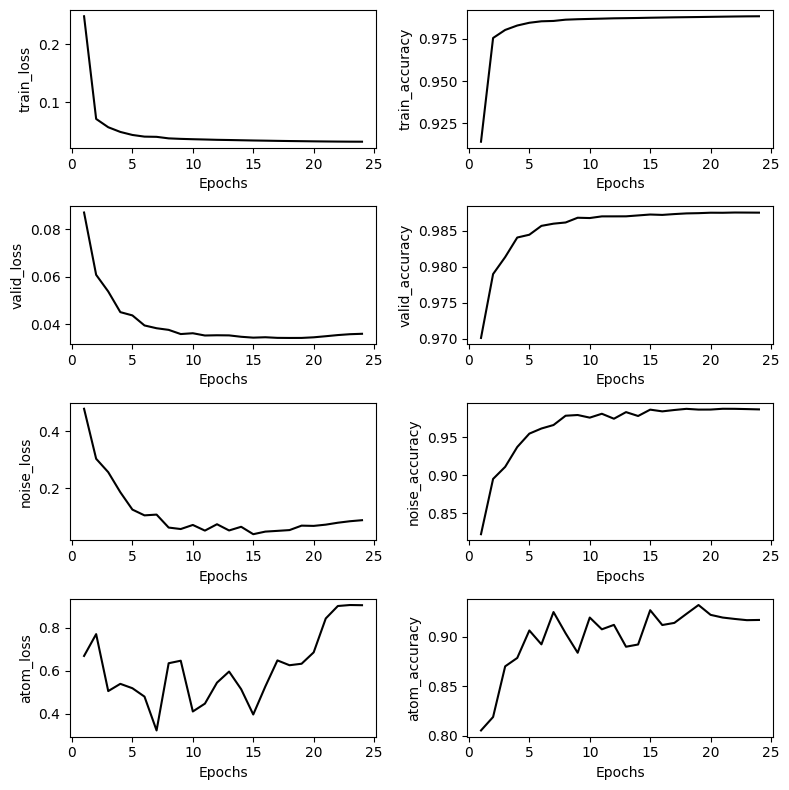

In [2]:
training_specs['ds_size'] = 10000000
training_specs['folder_name'] = task_name + '-10m'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 1K training dataset size 

In [ ]:
training_specs['ds_size'] = 1000
training_specs['folder_name'] = task_name + '-1k'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000, 121000, 122000, 123000, 124000, 125000, 126000, 127000, 128000, 129000, 130000, 131000, 132000, 133000, 134000, 135000, 136000, 137000, 138000, 

Train:   0%|          | 0/3 [00:01<?, ?it/s]


RuntimeError: Caught RuntimeError in replica 0 on device 7.
Original Traceback (most recent call last):
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/parallel/parallel_apply.py", line 96, in _worker
    output = module(*input, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/parallel/data_parallel.py", line 193, in forward
    outputs = self.parallel_apply(replicas, inputs, module_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/parallel/data_parallel.py", line 212, in parallel_apply
    return parallel_apply(
           ^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/parallel/parallel_apply.py", line 126, in parallel_apply
    output.reraise()
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/_utils.py", line 715, in reraise
    raise exception
RuntimeError: Caught RuntimeError in replica 1 on device 8.
Original Traceback (most recent call last):
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/parallel/parallel_apply.py", line 96, in _worker
    output = module(*input, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/timm/models/xcit.py", line 554, in forward
    x = self.forward_features(x)
        ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/timm/models/xcit.py", line 522, in forward_features
    x, (Hp, Wp) = self.patch_embed(x)
                  ^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/timm/models/xcit.py", line 109, in forward
    x = self.proj(x)
        ^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/container.py", line 250, in forward
    input = module(input)
            ^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/container.py", line 250, in forward
    input = module(input)
            ^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/conv.py", line 554, in forward
    return self._conv_forward(input, self.weight, self.bias)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/torch/nn/modules/conv.py", line 549, in _conv_forward
    return F.conv2d(
           ^^^^^^^^^
RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:8 and cuda:7! (when checking argument for argument weight in method wrapper_CUDA__cudnn_convolution)



### 5k dataset

In [ ]:
training_specs['ds_size'] = 5000
training_specs['folder_name'] = task_name + '-5k'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yig319 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000, 5200, 5400, 5600, 5800, 6000, 6200, 6400, 6600, 6800, 7000, 7200, 7400, 7600, 7800, 8000, 8200, 8400, 8600, 8800, 9000, 9200, 9400, 9600, 9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000, 13200, 13400, 13600, 13800, 14000, 14200, 14400, 14600, 14800, 15000, 15200, 15400, 15600, 15800, 16000, 16200, 16400, 16600, 16800, 17000, 17200, 17400, 17600, 17800, 18000, 18200, 18400, 18600, 18800, 19000, 19200, 19400, 19600, 19800, 20000, 20200, 20400, 20600, 20800, 21000, 21200, 21400, 21600, 21800, 22000, 22200, 22400, 22600, 22800, 23000, 23200, 23400, 23600, 23800, 24000, 24200, 24400, 24600, 24800, 25000, 25200, 25400, 25600, 25800, 26000, 26200, 26400, 26600, 26800, 27000, 27200, 27400, 27600, 27800, 28000, 28200, 28400, 28600, 28800, 29000, 29200, 29400, 29600, 29800, 30000,

Train: 100%|██████████| 13/13 [00:24<00:00,  1.88s/it]


train_loss: 2.9033, train_accuracy: 6.22%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


valid_loss: 2.9356, valid_accuracy: 4.88%
Model saved at epoch 0
Saved new best model at epoch 0 with valid dataset


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]


noise_loss: 2.9252, noise_accuracy: 5.62%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]

atom_loss: 2.9157, atom_accuracy: 5.94%


Model saved at epoch 200
Epoch: 201/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.82s/it]


train_loss: 0.0404, train_accuracy: 98.66%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


valid_loss: 5.0154, valid_accuracy: 13.44%
Model saved at epoch 200
Saved new best model at epoch 200 with valid dataset


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]


noise_loss: 5.6184, noise_accuracy: 6.90%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

atom_loss: 5.9144, atom_accuracy: 8.46%


Model saved at epoch 400
Epoch: 401/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.84s/it]


train_loss: 0.0299, train_accuracy: 98.94%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


valid_loss: 5.5537, valid_accuracy: 13.12%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]


noise_loss: 6.3857, noise_accuracy: 7.14%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]


atom_loss: 6.5710, atom_accuracy: 7.44%
Model saved at epoch 600
Epoch: 601/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.81s/it]


train_loss: 0.0298, train_accuracy: 98.90%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


valid_loss: 6.0813, valid_accuracy: 12.72%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]


noise_loss: 6.9265, noise_accuracy: 6.60%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]


atom_loss: 7.1411, atom_accuracy: 7.94%
Model saved at epoch 800
Epoch: 801/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.82s/it]


train_loss: 0.0299, train_accuracy: 99.00%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]


valid_loss: 6.0158, valid_accuracy: 13.44%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]


noise_loss: 6.5010, noise_accuracy: 6.36%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]


atom_loss: 7.2438, atom_accuracy: 7.54%
Model saved at epoch 1000
Epoch: 1001/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.82s/it]


train_loss: 0.0293, train_accuracy: 98.94%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


valid_loss: 6.6520, valid_accuracy: 15.52%
Model saved at epoch 1000
Saved new best model at epoch 1000 with valid dataset


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]


noise_loss: 7.5072, noise_accuracy: 6.24%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]


atom_loss: 7.9674, atom_accuracy: 8.68%
Model saved at epoch 1200
Epoch: 1201/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.84s/it]


train_loss: 0.0295, train_accuracy: 99.00%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


valid_loss: 6.9329, valid_accuracy: 14.08%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.36it/s]


noise_loss: 7.6557, noise_accuracy: 5.54%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.36it/s]

atom_loss: 8.6477, atom_accuracy: 6.40%


Model saved at epoch 1400
Epoch: 1401/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.83s/it]


train_loss: 0.0468, train_accuracy: 98.54%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


valid_loss: 7.0892, valid_accuracy: 16.88%
Model saved at epoch 1400
Saved new best model at epoch 1400 with valid dataset


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.36it/s]


noise_loss: 8.0864, noise_accuracy: 5.82%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.36it/s]

atom_loss: 8.6885, atom_accuracy: 6.92%


Model saved at epoch 1600
Epoch: 1601/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.82s/it]


train_loss: 0.0338, train_accuracy: 98.74%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


valid_loss: 6.6915, valid_accuracy: 16.32%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.36it/s]


noise_loss: 7.8244, noise_accuracy: 6.12%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

atom_loss: 8.7457, atom_accuracy: 8.00%


Model saved at epoch 1800
Epoch: 1801/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.81s/it]


train_loss: 0.0296, train_accuracy: 98.96%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]


valid_loss: 6.8677, valid_accuracy: 15.12%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.35it/s]


noise_loss: 8.3496, noise_accuracy: 6.02%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.39it/s]


atom_loss: 8.6707, atom_accuracy: 8.66%
Model saved at epoch 2000
Epoch: 2001/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.81s/it]


train_loss: 0.0299, train_accuracy: 98.88%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


valid_loss: 6.8058, valid_accuracy: 16.32%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.35it/s]


noise_loss: 7.9675, noise_accuracy: 6.30%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.39it/s]

atom_loss: 8.5645, atom_accuracy: 9.12%


Model saved at epoch 2200
Epoch: 2201/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.83s/it]


train_loss: 0.0292, train_accuracy: 98.94%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]


valid_loss: 7.0465, valid_accuracy: 15.28%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]


noise_loss: 8.5991, noise_accuracy: 6.56%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]

atom_loss: 9.1564, atom_accuracy: 8.78%


Model saved at epoch 2400
Epoch: 2401/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.80s/it]


train_loss: 0.0297, train_accuracy: 98.96%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]


valid_loss: 7.1769, valid_accuracy: 16.80%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.39it/s]


noise_loss: 8.8458, noise_accuracy: 5.82%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.36it/s]

atom_loss: 9.5951, atom_accuracy: 6.36%


Model saved at epoch 2600
Epoch: 2601/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.80s/it]


train_loss: 0.0395, train_accuracy: 98.58%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


valid_loss: 5.6223, valid_accuracy: 16.96%
Model saved at epoch 2600
Saved new best model at epoch 2600 with valid dataset


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]


noise_loss: 6.9384, noise_accuracy: 6.18%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]

atom_loss: 8.0227, atom_accuracy: 7.72%


Model saved at epoch 2800
Epoch: 2801/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.82s/it]


train_loss: 0.0345, train_accuracy: 98.76%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


valid_loss: 5.4642, valid_accuracy: 18.00%
Model saved at epoch 2800
Saved new best model at epoch 2800 with valid dataset


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]


noise_loss: 7.3680, noise_accuracy: 6.54%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]


atom_loss: 8.0905, atom_accuracy: 4.88%
Model saved at epoch 3000
Epoch: 3001/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.80s/it]


train_loss: 0.0593, train_accuracy: 98.30%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


valid_loss: 5.6796, valid_accuracy: 15.68%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]


noise_loss: 7.2327, noise_accuracy: 5.60%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.36it/s]

atom_loss: 7.4976, atom_accuracy: 6.52%


Model saved at epoch 3200
Epoch: 3201/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.80s/it]


train_loss: 0.0299, train_accuracy: 98.96%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]


valid_loss: 6.2914, valid_accuracy: 20.64%
Model saved at epoch 3200
Saved new best model at epoch 3200 with valid dataset


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]


noise_loss: 8.0751, noise_accuracy: 5.56%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]

atom_loss: 8.1649, atom_accuracy: 11.90%


Model saved at epoch 3400
Epoch: 3401/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.84s/it]


train_loss: 0.0466, train_accuracy: 98.58%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


valid_loss: 5.9233, valid_accuracy: 18.40%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]


noise_loss: 7.1125, noise_accuracy: 6.22%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.39it/s]

atom_loss: 7.0072, atom_accuracy: 8.76%


Model saved at epoch 3600
Epoch: 3601/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.83s/it]


train_loss: 0.0309, train_accuracy: 98.88%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


valid_loss: 5.6728, valid_accuracy: 22.00%
Model saved at epoch 3600
Saved new best model at epoch 3600 with valid dataset


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]


noise_loss: 7.3184, noise_accuracy: 5.72%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]

atom_loss: 7.6602, atom_accuracy: 11.04%


Model saved at epoch 3800
Epoch: 3801/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.81s/it]


train_loss: 0.0297, train_accuracy: 98.96%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


valid_loss: 6.6886, valid_accuracy: 21.36%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.38it/s]


noise_loss: 8.0326, noise_accuracy: 6.42%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.35it/s]

atom_loss: 8.7616, atom_accuracy: 11.66%


Model saved at epoch 4000
Epoch: 4001/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.81s/it]


train_loss: 0.0322, train_accuracy: 98.88%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]


valid_loss: 5.3933, valid_accuracy: 22.16%
Model saved at epoch 4000
Saved new best model at epoch 4000 with valid dataset


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.36it/s]


noise_loss: 6.8829, noise_accuracy: 6.04%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.39it/s]

atom_loss: 7.8139, atom_accuracy: 10.74%


Model saved at epoch 4200
Epoch: 4201/40000


Train: 100%|██████████| 13/13 [00:23<00:00,  1.82s/it]


train_loss: 0.0305, train_accuracy: 98.92%


Valid: 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


valid_loss: 5.9021, valid_accuracy: 21.60%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.38it/s]


noise_loss: 7.6448, noise_accuracy: 5.62%


Valid: 100%|██████████| 13/13 [00:09<00:00,  1.39it/s]

atom_loss: 8.3931, atom_accuracy: 7.08%


### 10K dataset

In [ ]:
training_specs['ds_size'] = 10000
training_specs['folder_name'] = task_name + '-10k'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yig319 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400, 13500, 13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200, 15300, 15400, 15500, 15600, 15700, 15800

Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.86s/it]


train_loss: 2.8838, train_accuracy: 6.06%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.34it/s]


valid_loss: 2.8506, valid_accuracy: 6.24%
Model saved at epoch 0
Saved new best model at epoch 0 with valid dataset


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.41it/s]


noise_loss: 2.8504, noise_accuracy: 6.10%


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.36it/s]

atom_loss: 2.8651, atom_accuracy: 5.69%


Model saved at epoch 100
Epoch: 101/20000


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:45<00:00,  1.84s/it]


train_loss: 0.0346, train_accuracy: 98.86%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


valid_loss: 4.7730, valid_accuracy: 17.80%
Model saved at epoch 100
Saved new best model at epoch 100 with valid dataset


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.40it/s]


noise_loss: 6.2080, noise_accuracy: 5.08%


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.41it/s]

atom_loss: 6.2609, atom_accuracy: 8.02%


Model saved at epoch 200
Epoch: 201/20000


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.85s/it]


train_loss: 0.0320, train_accuracy: 98.84%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


valid_loss: 5.2011, valid_accuracy: 18.20%
Model saved at epoch 200
Saved new best model at epoch 200 with valid dataset


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.42it/s]


noise_loss: 6.9647, noise_accuracy: 4.89%


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.38it/s]


atom_loss: 6.8787, atom_accuracy: 9.00%
Model saved at epoch 300
Epoch: 301/20000


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.86s/it]


train_loss: 0.0319, train_accuracy: 98.89%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


valid_loss: 5.4406, valid_accuracy: 20.96%
Model saved at epoch 300
Saved new best model at epoch 300 with valid dataset


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.42it/s]


noise_loss: 7.3401, noise_accuracy: 5.97%


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.39it/s]


atom_loss: 7.6595, atom_accuracy: 8.62%
Model saved at epoch 400
Epoch: 401/20000


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.85s/it]


train_loss: 0.0677, train_accuracy: 97.82%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


valid_loss: 5.8661, valid_accuracy: 21.04%
Model saved at epoch 400
Saved new best model at epoch 400 with valid dataset


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.40it/s]


noise_loss: 7.8538, noise_accuracy: 5.56%


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.38it/s]


atom_loss: 8.9089, atom_accuracy: 6.87%
Model saved at epoch 500
Epoch: 501/20000


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.84s/it]


train_loss: 0.0303, train_accuracy: 98.94%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


valid_loss: 5.8724, valid_accuracy: 22.84%
Model saved at epoch 500
Saved new best model at epoch 500 with valid dataset


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.41it/s]


noise_loss: 8.1039, noise_accuracy: 5.18%


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.38it/s]


atom_loss: 7.5369, atom_accuracy: 12.60%
Model saved at epoch 600
Epoch: 601/20000


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.86s/it]


train_loss: 0.0303, train_accuracy: 98.93%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


valid_loss: 5.4050, valid_accuracy: 23.28%
Model saved at epoch 600
Saved new best model at epoch 600 with valid dataset


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.37it/s]


noise_loss: 7.6948, noise_accuracy: 5.44%


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.39it/s]


atom_loss: 7.4447, atom_accuracy: 10.71%
Model saved at epoch 700
Epoch: 701/20000


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.87s/it]


train_loss: 0.0303, train_accuracy: 98.95%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


valid_loss: 5.4962, valid_accuracy: 23.48%
Model saved at epoch 700
Saved new best model at epoch 700 with valid dataset


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.40it/s]


noise_loss: 8.0270, noise_accuracy: 5.83%


Valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.39it/s]


atom_loss: 7.2470, atom_accuracy: 11.18%
Model saved at epoch 800
Epoch: 801/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.86s/it]


train_loss: 0.0301, train_accuracy: 98.95%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


valid_loss: 5.4513, valid_accuracy: 26.00%
Model saved at epoch 800
Saved new best model at epoch 800 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.37it/s]


noise_loss: 8.1446, noise_accuracy: 5.48%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.36it/s]


atom_loss: 7.9370, atom_accuracy: 10.17%
Model saved at epoch 900
Epoch: 901/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.86s/it]


train_loss: 0.0301, train_accuracy: 98.89%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.14it/s]


valid_loss: 5.4792, valid_accuracy: 27.08%
Model saved at epoch 900
Saved new best model at epoch 900 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.34it/s]


noise_loss: 8.2898, noise_accuracy: 5.41%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.34it/s]


atom_loss: 7.8082, atom_accuracy: 10.42%
Model saved at epoch 1000
Epoch: 1001/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.88s/it]


train_loss: 0.0696, train_accuracy: 97.73%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.20it/s]


valid_loss: 4.2211, valid_accuracy: 28.72%
Model saved at epoch 1000
Saved new best model at epoch 1000 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.32it/s]


noise_loss: 6.6279, noise_accuracy: 6.23%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.33it/s]


atom_loss: 6.0203, atom_accuracy: 16.83%
Model saved at epoch 1100
Epoch: 1101/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:45<00:00,  1.84s/it]


train_loss: 0.0393, train_accuracy: 98.64%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


valid_loss: 4.7932, valid_accuracy: 30.40%
Model saved at epoch 1100
Saved new best model at epoch 1100 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.39it/s]


noise_loss: 8.6358, noise_accuracy: 6.06%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.41it/s]


atom_loss: 7.4288, atom_accuracy: 15.79%
Model saved at epoch 1200
Epoch: 1201/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:45<00:00,  1.83s/it]


train_loss: 0.0371, train_accuracy: 98.68%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


valid_loss: 4.1693, valid_accuracy: 32.44%
Model saved at epoch 1200
Saved new best model at epoch 1200 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.41it/s]


noise_loss: 7.1219, noise_accuracy: 6.12%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.42it/s]


atom_loss: 7.3523, atom_accuracy: 14.80%
Model saved at epoch 1300
Epoch: 1301/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.85s/it]


train_loss: 0.0356, train_accuracy: 98.81%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.24it/s]


valid_loss: 4.3985, valid_accuracy: 33.00%
Model saved at epoch 1300
Saved new best model at epoch 1300 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.36it/s]


noise_loss: 7.5562, noise_accuracy: 5.72%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.38it/s]


atom_loss: 6.5050, atom_accuracy: 21.68%
Model saved at epoch 1400
Epoch: 1401/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.87s/it]


train_loss: 0.0480, train_accuracy: 98.39%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


valid_loss: 4.0129, valid_accuracy: 35.24%
Model saved at epoch 1400
Saved new best model at epoch 1400 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.35it/s]


noise_loss: 7.0512, noise_accuracy: 6.31%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.38it/s]


atom_loss: 6.3530, atom_accuracy: 20.40%
Model saved at epoch 1500
Epoch: 1501/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.87s/it]


train_loss: 0.0352, train_accuracy: 98.77%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.19it/s]


valid_loss: 3.5679, valid_accuracy: 39.16%
Model saved at epoch 1500
Saved new best model at epoch 1500 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.31it/s]


noise_loss: 7.9835, noise_accuracy: 6.90%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.35it/s]

atom_loss: 6.0701, atom_accuracy: 22.85%


Model saved at epoch 1600
Epoch: 1601/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.86s/it]


train_loss: 0.0421, train_accuracy: 98.55%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.25it/s]


valid_loss: 3.6741, valid_accuracy: 37.96%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.37it/s]


noise_loss: 7.6517, noise_accuracy: 6.72%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.39it/s]


atom_loss: 5.8543, atom_accuracy: 22.91%
Model saved at epoch 1700
Epoch: 1701/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.86s/it]


train_loss: 0.0367, train_accuracy: 98.69%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.21it/s]


valid_loss: 3.7059, valid_accuracy: 41.08%
Model saved at epoch 1700
Saved new best model at epoch 1700 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.34it/s]


noise_loss: 8.1171, noise_accuracy: 6.96%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.37it/s]


atom_loss: 6.4039, atom_accuracy: 23.30%
Model saved at epoch 1800
Epoch: 1801/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.87s/it]


train_loss: 0.0779, train_accuracy: 97.65%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.24it/s]


valid_loss: 2.8076, valid_accuracy: 41.32%
Model saved at epoch 1800
Saved new best model at epoch 1800 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.34it/s]


noise_loss: 5.4456, noise_accuracy: 7.10%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.37it/s]


atom_loss: 5.7208, atom_accuracy: 20.82%
Model saved at epoch 1900
Epoch: 1901/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.88s/it]


train_loss: 0.0304, train_accuracy: 98.85%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.25it/s]


valid_loss: 3.4343, valid_accuracy: 47.16%
Model saved at epoch 1900
Saved new best model at epoch 1900 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.37it/s]


noise_loss: 6.9150, noise_accuracy: 6.91%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.32it/s]


atom_loss: 7.4339, atom_accuracy: 24.97%
Model saved at epoch 2000
Epoch: 2001/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.89s/it]


train_loss: 0.0321, train_accuracy: 98.90%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.16it/s]


valid_loss: 3.3992, valid_accuracy: 47.96%
Model saved at epoch 2000
Saved new best model at epoch 2000 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.34it/s]


noise_loss: 7.9854, noise_accuracy: 7.43%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.33it/s]


atom_loss: 7.0064, atom_accuracy: 23.69%
Model saved at epoch 2100
Epoch: 2101/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.85s/it]


train_loss: 0.0301, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.25it/s]


valid_loss: 3.4689, valid_accuracy: 50.52%
Model saved at epoch 2100
Saved new best model at epoch 2100 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.41it/s]


noise_loss: 8.7818, noise_accuracy: 7.57%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.38it/s]


atom_loss: 7.3928, atom_accuracy: 25.26%
Model saved at epoch 2200
Epoch: 2201/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.87s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.24it/s]


valid_loss: 3.0930, valid_accuracy: 51.80%
Model saved at epoch 2200
Saved new best model at epoch 2200 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.40it/s]


noise_loss: 7.9901, noise_accuracy: 8.08%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.38it/s]


atom_loss: 5.9858, atom_accuracy: 30.30%
Model saved at epoch 2300
Epoch: 2301/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.85s/it]


train_loss: 0.0301, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


valid_loss: 3.4937, valid_accuracy: 51.60%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.39it/s]


noise_loss: 8.9626, noise_accuracy: 7.85%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.38it/s]


atom_loss: 6.7415, atom_accuracy: 29.44%
Model saved at epoch 2400
Epoch: 2401/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.86s/it]


train_loss: 0.0419, train_accuracy: 98.52%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


valid_loss: 2.6107, valid_accuracy: 55.84%
Model saved at epoch 2400
Saved new best model at epoch 2400 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.40it/s]


noise_loss: 6.7108, noise_accuracy: 8.08%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.40it/s]


atom_loss: 6.4253, atom_accuracy: 26.15%
Model saved at epoch 2500
Epoch: 2501/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.85s/it]


train_loss: 0.0301, train_accuracy: 98.95%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


valid_loss: 2.8928, valid_accuracy: 56.44%
Model saved at epoch 2500
Saved new best model at epoch 2500 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.42it/s]


noise_loss: 6.9282, noise_accuracy: 9.21%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.41it/s]


atom_loss: 7.8093, atom_accuracy: 22.51%
Model saved at epoch 2600
Epoch: 2601/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.85s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


valid_loss: 2.4024, valid_accuracy: 59.88%
Model saved at epoch 2600
Saved new best model at epoch 2600 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.39it/s]


noise_loss: 6.1271, noise_accuracy: 9.99%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.42it/s]


atom_loss: 5.9350, atom_accuracy: 30.74%
Model saved at epoch 2700
Epoch: 2701/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.86s/it]


train_loss: 0.0318, train_accuracy: 98.92%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


valid_loss: 2.2731, valid_accuracy: 59.00%
Model saved at epoch 2700
Saved new best model at epoch 2700 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.38it/s]


noise_loss: 5.6150, noise_accuracy: 10.70%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.42it/s]


atom_loss: 6.1181, atom_accuracy: 28.85%
Model saved at epoch 2800
Epoch: 2801/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.86s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


valid_loss: 2.9526, valid_accuracy: 58.80%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.42it/s]


noise_loss: 6.8778, noise_accuracy: 10.38%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.41it/s]


atom_loss: 7.3846, atom_accuracy: 30.48%
Model saved at epoch 2900
Epoch: 2901/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.86s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


valid_loss: 2.5010, valid_accuracy: 61.76%
Model saved at epoch 2900
Saved new best model at epoch 2900 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.39it/s]


noise_loss: 6.8829, noise_accuracy: 12.78%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.39it/s]

atom_loss: 7.1186, atom_accuracy: 28.36%


Model saved at epoch 3000
Epoch: 3001/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.85s/it]


train_loss: 0.0754, train_accuracy: 97.45%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.22it/s]


valid_loss: 1.8130, valid_accuracy: 61.20%
Model saved at epoch 3000
Saved new best model at epoch 3000 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.42it/s]


noise_loss: 4.7789, noise_accuracy: 14.32%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.42it/s]


atom_loss: 4.7607, atom_accuracy: 29.63%
Model saved at epoch 3100
Epoch: 3101/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.85s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.21it/s]


valid_loss: 2.7042, valid_accuracy: 62.04%
Model saved at epoch 3100
Saved new best model at epoch 3100 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.39it/s]


noise_loss: 8.3024, noise_accuracy: 14.63%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.37it/s]

atom_loss: 7.3095, atom_accuracy: 27.27%


Model saved at epoch 3200
Epoch: 3201/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.86s/it]


train_loss: 0.0300, train_accuracy: 98.95%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


valid_loss: 2.1540, valid_accuracy: 65.84%
Model saved at epoch 3200
Saved new best model at epoch 3200 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.36it/s]


noise_loss: 5.4924, noise_accuracy: 15.97%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.39it/s]


atom_loss: 6.5944, atom_accuracy: 31.79%
Model saved at epoch 3300
Epoch: 3301/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.85s/it]


train_loss: 0.0299, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.18it/s]


valid_loss: 2.5911, valid_accuracy: 65.08%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.37it/s]


noise_loss: 6.4843, noise_accuracy: 16.14%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.36it/s]

atom_loss: 7.4730, atom_accuracy: 32.11%


Model saved at epoch 3400
Epoch: 3401/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.84s/it]


train_loss: 0.0320, train_accuracy: 98.89%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


valid_loss: 2.1069, valid_accuracy: 65.72%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.35it/s]


noise_loss: 6.3174, noise_accuracy: 17.30%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.38it/s]


atom_loss: 5.8405, atom_accuracy: 35.84%
Model saved at epoch 3500
Epoch: 3501/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:45<00:00,  1.83s/it]


train_loss: 0.0299, train_accuracy: 98.95%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.23it/s]


valid_loss: 2.5616, valid_accuracy: 66.20%
Model saved at epoch 3500
Saved new best model at epoch 3500 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.43it/s]


noise_loss: 7.1106, noise_accuracy: 19.40%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.42it/s]


atom_loss: 7.8439, atom_accuracy: 28.18%
Model saved at epoch 3600
Epoch: 3601/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.88s/it]


train_loss: 0.0300, train_accuracy: 98.95%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.17it/s]


valid_loss: 2.7859, valid_accuracy: 65.84%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.30it/s]


noise_loss: 7.9488, noise_accuracy: 18.73%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.28it/s]


atom_loss: 8.4694, atom_accuracy: 27.62%
Model saved at epoch 3700
Epoch: 3701/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.87s/it]


train_loss: 0.0301, train_accuracy: 98.95%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.25it/s]


valid_loss: 2.0624, valid_accuracy: 66.84%
Model saved at epoch 3700
Saved new best model at epoch 3700 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.30it/s]


noise_loss: 5.1879, noise_accuracy: 21.14%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.31it/s]


atom_loss: 5.8624, atom_accuracy: 35.28%
Model saved at epoch 3800
Epoch: 3801/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.88s/it]


train_loss: 0.0299, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.25it/s]


valid_loss: 2.2046, valid_accuracy: 68.56%
Model saved at epoch 3800
Saved new best model at epoch 3800 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.31it/s]


noise_loss: 5.4908, noise_accuracy: 20.94%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.36it/s]


atom_loss: 7.0074, atom_accuracy: 32.80%
Model saved at epoch 3900
Epoch: 3901/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.90s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.21it/s]


valid_loss: 2.3529, valid_accuracy: 68.88%
Model saved at epoch 3900
Saved new best model at epoch 3900 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.27it/s]


noise_loss: 5.9018, noise_accuracy: 21.34%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.25it/s]


atom_loss: 7.3473, atom_accuracy: 32.84%
Model saved at epoch 4000
Epoch: 4001/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.86s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


valid_loss: 2.0869, valid_accuracy: 69.44%
Model saved at epoch 4000
Saved new best model at epoch 4000 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.33it/s]


noise_loss: 5.3191, noise_accuracy: 22.91%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.34it/s]


atom_loss: 6.8271, atom_accuracy: 35.66%
Model saved at epoch 4100
Epoch: 4101/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.89s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


valid_loss: 2.5002, valid_accuracy: 69.40%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.36it/s]


noise_loss: 7.3154, noise_accuracy: 22.42%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.36it/s]


atom_loss: 8.0898, atom_accuracy: 35.02%
Model saved at epoch 4200
Epoch: 4201/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:48<00:00,  1.93s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.21it/s]


valid_loss: 1.8682, valid_accuracy: 70.92%
Model saved at epoch 4200
Saved new best model at epoch 4200 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.33it/s]


noise_loss: 5.1027, noise_accuracy: 23.96%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.21it/s]


atom_loss: 6.2235, atom_accuracy: 38.52%
Model saved at epoch 4300
Epoch: 4301/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.88s/it]


train_loss: 0.0299, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.25it/s]


valid_loss: 2.1721, valid_accuracy: 71.16%
Model saved at epoch 4300
Saved new best model at epoch 4300 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.30it/s]


noise_loss: 6.1793, noise_accuracy: 24.21%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.29it/s]


atom_loss: 7.1202, atom_accuracy: 38.19%
Model saved at epoch 4400
Epoch: 4401/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.89s/it]


train_loss: 0.0303, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.21it/s]


valid_loss: 1.9923, valid_accuracy: 70.28%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.29it/s]


noise_loss: 6.2891, noise_accuracy: 25.55%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.29it/s]


atom_loss: 6.8673, atom_accuracy: 32.47%
Model saved at epoch 4500
Epoch: 4501/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.89s/it]


train_loss: 0.0302, train_accuracy: 98.95%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.22it/s]


valid_loss: 1.8199, valid_accuracy: 72.60%
Model saved at epoch 4500
Saved new best model at epoch 4500 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.30it/s]


noise_loss: 5.3073, noise_accuracy: 26.36%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.28it/s]


atom_loss: 7.1595, atom_accuracy: 32.82%
Model saved at epoch 4600
Epoch: 4601/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.90s/it]


train_loss: 0.0303, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.22it/s]


valid_loss: 1.6616, valid_accuracy: 70.88%
Model saved at epoch 4600
Saved new best model at epoch 4600 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.29it/s]


noise_loss: 4.1762, noise_accuracy: 28.28%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.27it/s]


atom_loss: 5.9152, atom_accuracy: 33.97%
Model saved at epoch 4700
Epoch: 4701/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.89s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.25it/s]


valid_loss: 1.9032, valid_accuracy: 70.84%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.30it/s]


noise_loss: 4.2764, noise_accuracy: 29.51%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.34it/s]


atom_loss: 5.9080, atom_accuracy: 35.48%
Model saved at epoch 4800
Epoch: 4801/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:48<00:00,  1.93s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.23it/s]


valid_loss: 2.2421, valid_accuracy: 70.72%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.32it/s]


noise_loss: 5.9523, noise_accuracy: 28.87%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.34it/s]


atom_loss: 7.1446, atom_accuracy: 36.48%
Model saved at epoch 4900
Epoch: 4901/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.90s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.21it/s]


valid_loss: 1.8664, valid_accuracy: 70.28%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.30it/s]


noise_loss: 5.0787, noise_accuracy: 28.15%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.33it/s]


atom_loss: 6.0369, atom_accuracy: 36.52%
Model saved at epoch 5000
Epoch: 5001/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.89s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.20it/s]


valid_loss: 2.1710, valid_accuracy: 70.76%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.34it/s]


noise_loss: 6.1713, noise_accuracy: 28.37%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.32it/s]

atom_loss: 6.8234, atom_accuracy: 36.04%


Model saved at epoch 5100
Epoch: 5101/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.89s/it]


train_loss: 0.0299, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


valid_loss: 2.0602, valid_accuracy: 70.04%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.32it/s]


noise_loss: 4.9869, noise_accuracy: 30.23%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.34it/s]


atom_loss: 6.4830, atom_accuracy: 38.55%
Model saved at epoch 5200
Epoch: 5201/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.90s/it]


train_loss: 0.0300, train_accuracy: 98.95%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.22it/s]


valid_loss: 1.7386, valid_accuracy: 71.80%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.30it/s]


noise_loss: 4.8427, noise_accuracy: 27.69%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.24it/s]


atom_loss: 6.3940, atom_accuracy: 35.20%
Model saved at epoch 5300
Epoch: 5301/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.90s/it]


train_loss: 0.0299, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.18it/s]


valid_loss: 2.1737, valid_accuracy: 71.28%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.26it/s]


noise_loss: 6.1797, noise_accuracy: 28.21%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.29it/s]


atom_loss: 7.6151, atom_accuracy: 35.61%
Model saved at epoch 5400
Epoch: 5401/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.90s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.15it/s]


valid_loss: 1.8419, valid_accuracy: 72.04%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.29it/s]


noise_loss: 4.7176, noise_accuracy: 30.11%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.21it/s]


atom_loss: 5.7161, atom_accuracy: 40.49%
Model saved at epoch 5500
Epoch: 5501/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:48<00:00,  1.93s/it]


train_loss: 0.0299, train_accuracy: 98.95%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.20it/s]


valid_loss: 1.9649, valid_accuracy: 71.80%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.27it/s]


noise_loss: 5.2113, noise_accuracy: 31.88%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.31it/s]


atom_loss: 6.4368, atom_accuracy: 37.65%
Model saved at epoch 5600
Epoch: 5601/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.89s/it]


train_loss: 0.0305, train_accuracy: 98.95%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.23it/s]


valid_loss: 1.6841, valid_accuracy: 72.56%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.27it/s]


noise_loss: 4.3587, noise_accuracy: 29.81%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.29it/s]


atom_loss: 5.7495, atom_accuracy: 39.31%
Model saved at epoch 5700
Epoch: 5701/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.90s/it]


train_loss: 0.0299, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.19it/s]


valid_loss: 2.0546, valid_accuracy: 71.56%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.30it/s]


noise_loss: 5.4018, noise_accuracy: 28.33%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.30it/s]


atom_loss: 5.8891, atom_accuracy: 39.74%
Model saved at epoch 5800
Epoch: 5801/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:48<00:00,  1.93s/it]


train_loss: 0.0299, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.19it/s]


valid_loss: 2.2195, valid_accuracy: 71.52%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.31it/s]


noise_loss: 5.8571, noise_accuracy: 29.52%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.32it/s]


atom_loss: 6.5368, atom_accuracy: 39.49%
Model saved at epoch 5900
Epoch: 5901/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:48<00:00,  1.92s/it]


train_loss: 0.0302, train_accuracy: 98.93%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


valid_loss: 1.8983, valid_accuracy: 72.64%
Model saved at epoch 5900
Saved new best model at epoch 5900 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.36it/s]


noise_loss: 4.6014, noise_accuracy: 32.76%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.36it/s]


atom_loss: 5.9808, atom_accuracy: 39.02%
Model saved at epoch 6000
Epoch: 6001/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:46<00:00,  1.87s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.19it/s]


valid_loss: 1.8822, valid_accuracy: 73.16%
Model saved at epoch 6000
Saved new best model at epoch 6000 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.29it/s]


noise_loss: 4.3692, noise_accuracy: 34.15%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.33it/s]

atom_loss: 6.7167, atom_accuracy: 37.20%


Model saved at epoch 6100
Epoch: 6101/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:47<00:00,  1.89s/it]


train_loss: 0.0299, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


valid_loss: 2.0303, valid_accuracy: 72.76%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.35it/s]


noise_loss: 4.5823, noise_accuracy: 33.71%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.25it/s]


atom_loss: 7.2699, atom_accuracy: 36.85%
Model saved at epoch 6200
Epoch: 6201/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:48<00:00,  1.95s/it]


train_loss: 0.0301, train_accuracy: 98.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.20it/s]


valid_loss: 1.6353, valid_accuracy: 73.88%
Model saved at epoch 6200
Saved new best model at epoch 6200 with valid dataset


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.33it/s]


noise_loss: 4.5168, noise_accuracy: 34.03%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.30it/s]


atom_loss: 5.8998, atom_accuracy: 36.54%
Model saved at epoch 6300
Epoch: 6301/20000


Train: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:48<00:00,  1.92s/it]


train_loss: 0.0299, train_accuracy: 98.95%


Valid: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.25it/s]


valid_loss: 1.8610, valid_accuracy: 72.68%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.24it/s]


noise_loss: 5.0656, noise_accuracy: 32.82%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.24it/s]


atom_loss: 6.6223, atom_accuracy: 39.09%


### 50k dataset

In [ ]:
training_specs['ds_size'] = 50000
training_specs['folder_name'] = task_name + '-50k'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yig319 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020, 2040, 2060, 2080, 2100, 2120, 2140, 2160, 2180, 2200, 2220, 2240, 2260, 2280, 2300, 2320, 2340, 2360, 2380, 2400, 2420, 2440, 2460, 2480, 2500, 2520, 2540, 2560, 2580, 2600, 2620, 2640, 2660, 2680, 2700, 2720, 2740, 2760, 2780, 2800, 2820, 2840, 2860, 2880, 2900, 2920, 2940, 2960, 2980, 3000, 3020, 3040, 3060, 3080, 3100, 3120, 3140, 3160, 3180, 3200, 3220, 3240, 3260, 3280, 3300, 3320, 3340, 3360, 3380, 3400, 3420, 3440, 3460, 3480, 3500,

Train: 100%|██████████| 125/125 [03:45<00:00,  1.81s/it]


train_loss: 2.8362, train_accuracy: 7.56%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]


valid_loss: 2.7904, valid_accuracy: 8.74%
Model saved at epoch 0
Saved new best model at epoch 0 with valid dataset


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.44it/s]


noise_loss: 2.9813, noise_accuracy: 5.95%


Valid: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]


atom_loss: 2.7435, atom_accuracy: 15.91%
Model saved at epoch 20
Epoch: 21/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.82s/it]


train_loss: 0.0880, train_accuracy: 97.31%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]


valid_loss: 1.2157, valid_accuracy: 70.36%
Model saved at epoch 20
Saved new best model at epoch 20 with valid dataset


Valid: 100%|██████████| 125/125 [01:24<00:00,  1.48it/s]


noise_loss: 5.6895, noise_accuracy: 9.84%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


atom_loss: 4.8808, atom_accuracy: 25.04%
Model saved at epoch 40
Epoch: 41/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.81s/it]


train_loss: 0.0557, train_accuracy: 98.16%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 1.3971, valid_accuracy: 72.31%
Model saved at epoch 40
Saved new best model at epoch 40 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


noise_loss: 6.8741, noise_accuracy: 10.02%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 5.5867, atom_accuracy: 28.12%
Model saved at epoch 60
Epoch: 61/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.81s/it]


train_loss: 0.0523, train_accuracy: 98.22%


Valid: 100%|██████████| 32/32 [00:21<00:00,  1.47it/s]


valid_loss: 1.4438, valid_accuracy: 72.99%
Model saved at epoch 60
Saved new best model at epoch 60 with valid dataset


Valid: 100%|██████████| 125/125 [01:24<00:00,  1.48it/s]


noise_loss: 7.0831, noise_accuracy: 11.07%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.45it/s]


atom_loss: 5.9778, atom_accuracy: 26.43%
Model saved at epoch 80
Epoch: 81/4000


Train: 100%|██████████| 125/125 [03:45<00:00,  1.81s/it]


train_loss: 0.0411, train_accuracy: 98.61%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]


valid_loss: 1.3923, valid_accuracy: 75.01%
Model saved at epoch 80
Saved new best model at epoch 80 with valid dataset


Valid: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]


noise_loss: 6.4649, noise_accuracy: 12.58%


Valid: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]


atom_loss: 5.9992, atom_accuracy: 29.06%
Model saved at epoch 100
Epoch: 101/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.81s/it]


train_loss: 0.0522, train_accuracy: 98.20%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


valid_loss: 1.3546, valid_accuracy: 75.06%
Model saved at epoch 100
Saved new best model at epoch 100 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 7.3688, noise_accuracy: 11.07%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


atom_loss: 5.8866, atom_accuracy: 31.10%
Model saved at epoch 120
Epoch: 121/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.81s/it]


train_loss: 0.0643, train_accuracy: 97.78%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]


valid_loss: 1.3671, valid_accuracy: 73.58%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 6.1989, noise_accuracy: 13.50%


Valid: 100%|██████████| 125/125 [01:24<00:00,  1.47it/s]


atom_loss: 5.8073, atom_accuracy: 29.21%
Model saved at epoch 140
Epoch: 141/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.81s/it]


train_loss: 0.0445, train_accuracy: 98.46%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]


valid_loss: 1.3079, valid_accuracy: 76.75%
Model saved at epoch 140
Saved new best model at epoch 140 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 6.5500, noise_accuracy: 14.76%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


atom_loss: 5.8733, atom_accuracy: 31.63%
Model saved at epoch 160
Epoch: 161/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0417, train_accuracy: 98.53%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]


valid_loss: 1.3213, valid_accuracy: 76.88%
Model saved at epoch 160
Saved new best model at epoch 160 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 6.5495, noise_accuracy: 15.22%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


atom_loss: 5.5747, atom_accuracy: 33.12%
Model saved at epoch 180
Epoch: 181/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.82s/it]


train_loss: 0.0477, train_accuracy: 98.33%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


valid_loss: 1.1185, valid_accuracy: 78.38%
Model saved at epoch 180
Saved new best model at epoch 180 with valid dataset


Valid: 100%|██████████| 125/125 [01:24<00:00,  1.47it/s]


noise_loss: 5.3201, noise_accuracy: 17.87%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


atom_loss: 4.6740, atom_accuracy: 37.19%
Model saved at epoch 200
Epoch: 201/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0481, train_accuracy: 98.36%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 1.1903, valid_accuracy: 77.91%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


noise_loss: 6.0453, noise_accuracy: 14.87%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 5.3221, atom_accuracy: 33.53%
Model saved at epoch 220
Epoch: 221/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.81s/it]


train_loss: 0.0466, train_accuracy: 98.40%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 1.1006, valid_accuracy: 78.31%
Model saved at epoch 220
Saved new best model at epoch 220 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


noise_loss: 5.0468, noise_accuracy: 19.04%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 4.6580, atom_accuracy: 39.67%
Model saved at epoch 240
Epoch: 241/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0530, train_accuracy: 98.15%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.9961, valid_accuracy: 80.08%
Model saved at epoch 240
Saved new best model at epoch 240 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


noise_loss: 5.0908, noise_accuracy: 20.39%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 4.8434, atom_accuracy: 35.95%
Model saved at epoch 260
Epoch: 261/4000


Train: 100%|██████████| 125/125 [03:48<00:00,  1.82s/it]


train_loss: 0.0445, train_accuracy: 98.45%


Valid: 100%|██████████| 32/32 [00:23<00:00,  1.38it/s]


valid_loss: 1.0357, valid_accuracy: 79.82%


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.44it/s]


noise_loss: 5.0222, noise_accuracy: 22.40%


Valid: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]

atom_loss: 5.0755, atom_accuracy: 36.09%


Model saved at epoch 280
Epoch: 281/4000


Train: 100%|██████████| 125/125 [03:48<00:00,  1.82s/it]


train_loss: 0.0450, train_accuracy: 98.42%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


valid_loss: 0.9572, valid_accuracy: 81.22%
Model saved at epoch 280
Saved new best model at epoch 280 with valid dataset


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 4.9844, noise_accuracy: 20.88%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]

atom_loss: 4.9985, atom_accuracy: 37.84%


Model saved at epoch 300
Epoch: 301/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0455, train_accuracy: 98.47%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


valid_loss: 0.9628, valid_accuracy: 81.42%
Model saved at epoch 300
Saved new best model at epoch 300 with valid dataset


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.43it/s]


noise_loss: 4.8613, noise_accuracy: 22.31%


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.44it/s]


atom_loss: 4.7344, atom_accuracy: 40.26%
Model saved at epoch 320
Epoch: 321/4000


Train: 100%|██████████| 125/125 [03:49<00:00,  1.83s/it]


train_loss: 0.0400, train_accuracy: 98.64%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


valid_loss: 0.9051, valid_accuracy: 82.09%
Model saved at epoch 320
Saved new best model at epoch 320 with valid dataset


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.43it/s]


noise_loss: 5.1756, noise_accuracy: 22.84%


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.43it/s]


atom_loss: 4.7178, atom_accuracy: 40.70%
Model saved at epoch 340
Epoch: 341/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.81s/it]


train_loss: 0.0469, train_accuracy: 98.35%


Valid: 100%|██████████| 32/32 [00:21<00:00,  1.47it/s]


valid_loss: 0.9212, valid_accuracy: 81.45%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


noise_loss: 4.0596, noise_accuracy: 24.84%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


atom_loss: 3.6061, atom_accuracy: 47.03%
Model saved at epoch 360
Epoch: 361/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0384, train_accuracy: 98.66%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.8326, valid_accuracy: 83.83%
Model saved at epoch 360
Saved new best model at epoch 360 with valid dataset


Valid: 100%|██████████| 125/125 [01:24<00:00,  1.48it/s]


noise_loss: 5.0238, noise_accuracy: 22.45%


Valid: 100%|██████████| 125/125 [01:24<00:00,  1.48it/s]


atom_loss: 4.3256, atom_accuracy: 43.38%
Model saved at epoch 380
Epoch: 381/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.81s/it]


train_loss: 0.0457, train_accuracy: 98.38%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]


valid_loss: 0.6832, valid_accuracy: 85.22%
Model saved at epoch 380
Saved new best model at epoch 380 with valid dataset


Valid: 100%|██████████| 125/125 [01:24<00:00,  1.47it/s]


noise_loss: 3.7804, noise_accuracy: 29.58%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]

atom_loss: 3.9616, atom_accuracy: 44.62%


Model saved at epoch 400
Epoch: 401/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.81s/it]


train_loss: 0.0387, train_accuracy: 98.67%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


valid_loss: 0.7290, valid_accuracy: 85.16%


Valid: 100%|██████████| 125/125 [01:24<00:00,  1.48it/s]


noise_loss: 3.7262, noise_accuracy: 31.71%


Valid: 100%|██████████| 125/125 [01:24<00:00,  1.48it/s]


atom_loss: 3.2904, atom_accuracy: 51.43%
Model saved at epoch 420
Epoch: 421/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0378, train_accuracy: 98.68%


Valid: 100%|██████████| 32/32 [00:21<00:00,  1.46it/s]


valid_loss: 0.7064, valid_accuracy: 85.67%
Model saved at epoch 420
Saved new best model at epoch 420 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 3.8273, noise_accuracy: 32.29%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 4.0234, atom_accuracy: 44.79%
Model saved at epoch 440
Epoch: 441/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0378, train_accuracy: 98.69%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]


valid_loss: 0.6488, valid_accuracy: 86.56%
Model saved at epoch 440
Saved new best model at epoch 440 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


noise_loss: 3.3041, noise_accuracy: 36.80%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 3.7002, atom_accuracy: 48.91%
Model saved at epoch 460
Epoch: 461/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0419, train_accuracy: 98.52%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


valid_loss: 0.5926, valid_accuracy: 87.24%
Model saved at epoch 460
Saved new best model at epoch 460 with valid dataset


Valid: 100%|██████████| 125/125 [01:24<00:00,  1.47it/s]


noise_loss: 3.3739, noise_accuracy: 38.99%


Valid: 100%|██████████| 125/125 [01:24<00:00,  1.47it/s]


atom_loss: 3.1488, atom_accuracy: 51.74%
Model saved at epoch 480
Epoch: 481/4000


Train: 100%|██████████| 125/125 [03:48<00:00,  1.82s/it]


train_loss: 0.0420, train_accuracy: 98.56%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.6293, valid_accuracy: 87.02%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 3.3317, noise_accuracy: 35.10%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.45it/s]


atom_loss: 3.5009, atom_accuracy: 46.91%
Model saved at epoch 500
Epoch: 501/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0406, train_accuracy: 98.58%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]


valid_loss: 0.5821, valid_accuracy: 87.90%
Model saved at epoch 500
Saved new best model at epoch 500 with valid dataset


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.44it/s]


noise_loss: 3.2424, noise_accuracy: 41.94%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 3.0304, atom_accuracy: 52.55%
Model saved at epoch 520
Epoch: 521/4000


Train: 100%|██████████| 125/125 [03:48<00:00,  1.83s/it]


train_loss: 0.0389, train_accuracy: 98.68%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]


valid_loss: 0.5840, valid_accuracy: 87.89%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 3.2069, noise_accuracy: 40.31%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 3.4787, atom_accuracy: 51.63%
Model saved at epoch 540
Epoch: 541/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.81s/it]


train_loss: 0.0398, train_accuracy: 98.60%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


valid_loss: 0.4797, valid_accuracy: 89.02%
Model saved at epoch 540
Saved new best model at epoch 540 with valid dataset


Valid: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]


noise_loss: 2.6789, noise_accuracy: 43.54%


Valid: 100%|██████████| 125/125 [01:24<00:00,  1.49it/s]


atom_loss: 3.0346, atom_accuracy: 55.09%
Model saved at epoch 560
Epoch: 561/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0364, train_accuracy: 98.70%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.4803, valid_accuracy: 89.22%
Model saved at epoch 560
Saved new best model at epoch 560 with valid dataset


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 2.5101, noise_accuracy: 48.92%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 2.3129, atom_accuracy: 61.99%
Model saved at epoch 580
Epoch: 581/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0345, train_accuracy: 98.77%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.5069, valid_accuracy: 89.97%
Model saved at epoch 580
Saved new best model at epoch 580 with valid dataset


Valid: 100%|██████████| 125/125 [01:24<00:00,  1.47it/s]


noise_loss: 3.0908, noise_accuracy: 47.95%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


atom_loss: 3.3573, atom_accuracy: 54.31%
Model saved at epoch 600
Epoch: 601/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.81s/it]


train_loss: 0.0376, train_accuracy: 98.67%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.4578, valid_accuracy: 89.80%
Model saved at epoch 600
Saved new best model at epoch 600 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 2.4088, noise_accuracy: 50.98%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


atom_loss: 2.9981, atom_accuracy: 55.02%
Model saved at epoch 620
Epoch: 621/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0353, train_accuracy: 98.73%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.4658, valid_accuracy: 90.19%
Model saved at epoch 620
Saved new best model at epoch 620 with valid dataset


Valid: 100%|██████████| 125/125 [01:24<00:00,  1.47it/s]


noise_loss: 2.7583, noise_accuracy: 50.52%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 3.1404, atom_accuracy: 55.15%
Model saved at epoch 640
Epoch: 641/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0342, train_accuracy: 98.80%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.4584, valid_accuracy: 90.42%
Model saved at epoch 640
Saved new best model at epoch 640 with valid dataset


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 2.4218, noise_accuracy: 54.79%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 3.1705, atom_accuracy: 56.73%
Model saved at epoch 660
Epoch: 661/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0358, train_accuracy: 98.75%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]


valid_loss: 0.4541, valid_accuracy: 91.13%
Model saved at epoch 660
Saved new best model at epoch 660 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 2.5955, noise_accuracy: 51.94%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 2.9198, atom_accuracy: 58.46%
Model saved at epoch 680
Epoch: 681/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0340, train_accuracy: 98.81%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


valid_loss: 0.4714, valid_accuracy: 90.62%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.44it/s]


noise_loss: 2.3734, noise_accuracy: 55.26%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 2.7490, atom_accuracy: 59.52%
Model saved at epoch 700
Epoch: 701/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0339, train_accuracy: 98.81%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


valid_loss: 0.3941, valid_accuracy: 91.74%
Model saved at epoch 700
Saved new best model at epoch 700 with valid dataset


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 2.1759, noise_accuracy: 58.26%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 2.5038, atom_accuracy: 62.19%
Model saved at epoch 720
Epoch: 721/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0397, train_accuracy: 98.64%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


valid_loss: 0.4802, valid_accuracy: 89.87%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 2.5514, noise_accuracy: 51.71%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]

atom_loss: 3.0193, atom_accuracy: 54.74%


Model saved at epoch 740
Epoch: 741/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0335, train_accuracy: 98.83%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.39it/s]


valid_loss: 0.4365, valid_accuracy: 91.38%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.44it/s]


noise_loss: 2.2724, noise_accuracy: 59.97%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 2.9545, atom_accuracy: 59.14%
Model saved at epoch 760
Epoch: 761/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0372, train_accuracy: 98.73%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.3681, valid_accuracy: 91.97%
Model saved at epoch 760
Saved new best model at epoch 760 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 2.1260, noise_accuracy: 59.69%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 2.8877, atom_accuracy: 60.77%
Model saved at epoch 780
Epoch: 781/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0345, train_accuracy: 98.80%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]


valid_loss: 0.4161, valid_accuracy: 91.58%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 2.0195, noise_accuracy: 58.72%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]


atom_loss: 2.1745, atom_accuracy: 65.19%
Model saved at epoch 800
Epoch: 801/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0356, train_accuracy: 98.76%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.3864, valid_accuracy: 92.10%
Model saved at epoch 800
Saved new best model at epoch 800 with valid dataset


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 1.9184, noise_accuracy: 63.30%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 2.2742, atom_accuracy: 66.11%
Model saved at epoch 820
Epoch: 821/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0348, train_accuracy: 98.75%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


valid_loss: 0.3977, valid_accuracy: 92.70%
Model saved at epoch 820
Saved new best model at epoch 820 with valid dataset


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.43it/s]


noise_loss: 1.6794, noise_accuracy: 66.62%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 2.6425, atom_accuracy: 63.93%
Model saved at epoch 840
Epoch: 841/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0337, train_accuracy: 98.81%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.39it/s]


valid_loss: 0.3776, valid_accuracy: 92.60%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 2.3747, noise_accuracy: 56.60%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.44it/s]


atom_loss: 2.7667, atom_accuracy: 61.57%
Model saved at epoch 860
Epoch: 861/4000


Train: 100%|██████████| 125/125 [03:48<00:00,  1.83s/it]


train_loss: 0.0339, train_accuracy: 98.78%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.3721, valid_accuracy: 92.40%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.45it/s]


noise_loss: 1.8269, noise_accuracy: 62.94%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 2.8167, atom_accuracy: 60.72%
Model saved at epoch 880
Epoch: 881/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0300, train_accuracy: 98.91%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.3670, valid_accuracy: 93.31%
Model saved at epoch 880
Saved new best model at epoch 880 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.45it/s]


noise_loss: 2.5135, noise_accuracy: 63.12%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 2.6549, atom_accuracy: 65.53%
Model saved at epoch 900
Epoch: 901/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0289, train_accuracy: 98.95%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.3621, valid_accuracy: 93.74%
Model saved at epoch 900
Saved new best model at epoch 900 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 1.9013, noise_accuracy: 70.00%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]

atom_loss: 2.8077, atom_accuracy: 67.35%


Model saved at epoch 920
Epoch: 921/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0319, train_accuracy: 98.87%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.3597, valid_accuracy: 92.99%
Model saved at epoch 920
Saved new best model at epoch 920 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.45it/s]


noise_loss: 1.7606, noise_accuracy: 67.97%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 2.6452, atom_accuracy: 64.88%
Model saved at epoch 940
Epoch: 941/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0319, train_accuracy: 98.88%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]


valid_loss: 0.3277, valid_accuracy: 93.41%
Model saved at epoch 940
Saved new best model at epoch 940 with valid dataset


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 1.4578, noise_accuracy: 70.42%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.44it/s]

atom_loss: 2.8668, atom_accuracy: 63.49%


Model saved at epoch 960
Epoch: 961/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0291, train_accuracy: 98.95%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.3471, valid_accuracy: 93.78%
Model saved at epoch 960
Saved new best model at epoch 960 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.45it/s]


noise_loss: 1.9083, noise_accuracy: 68.80%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.45it/s]


atom_loss: 2.5302, atom_accuracy: 68.62%
Model saved at epoch 980
Epoch: 981/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0367, train_accuracy: 98.73%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]


valid_loss: 0.3055, valid_accuracy: 92.90%
Model saved at epoch 980
Saved new best model at epoch 980 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 1.3442, noise_accuracy: 69.28%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 1.9754, atom_accuracy: 65.98%
Model saved at epoch 1000
Epoch: 1001/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.82s/it]


train_loss: 0.0310, train_accuracy: 98.90%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]


valid_loss: 0.2995, valid_accuracy: 94.00%
Model saved at epoch 1000
Saved new best model at epoch 1000 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 1.4407, noise_accuracy: 72.93%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 2.3751, atom_accuracy: 68.09%
Model saved at epoch 1020
Epoch: 1021/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0333, train_accuracy: 98.85%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.3267, valid_accuracy: 93.68%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.45it/s]


noise_loss: 1.5436, noise_accuracy: 72.47%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 2.5690, atom_accuracy: 65.77%
Model saved at epoch 1040
Epoch: 1041/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0341, train_accuracy: 98.82%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.2729, valid_accuracy: 93.89%
Model saved at epoch 1040
Saved new best model at epoch 1040 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 1.3231, noise_accuracy: 71.72%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 2.2242, atom_accuracy: 67.69%
Model saved at epoch 1060
Epoch: 1061/4000


Train: 100%|██████████| 125/125 [03:48<00:00,  1.82s/it]


train_loss: 0.0365, train_accuracy: 98.73%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.2950, valid_accuracy: 92.70%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.44it/s]


noise_loss: 1.2380, noise_accuracy: 68.06%


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.43it/s]


atom_loss: 1.9589, atom_accuracy: 66.81%
Model saved at epoch 1080
Epoch: 1081/4000


Train: 100%|██████████| 125/125 [03:48<00:00,  1.83s/it]


train_loss: 0.0321, train_accuracy: 98.86%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.40it/s]


valid_loss: 0.3405, valid_accuracy: 93.74%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.44it/s]


noise_loss: 1.4037, noise_accuracy: 73.00%


Valid: 100%|██████████| 125/125 [01:29<00:00,  1.40it/s]


atom_loss: 1.9168, atom_accuracy: 73.81%
Model saved at epoch 1100
Epoch: 1101/4000


Train: 100%|██████████| 125/125 [03:48<00:00,  1.83s/it]


train_loss: 0.0305, train_accuracy: 98.90%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.3146, valid_accuracy: 94.21%
Model saved at epoch 1100
Saved new best model at epoch 1100 with valid dataset


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.44it/s]


noise_loss: 1.4007, noise_accuracy: 74.80%


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.43it/s]


atom_loss: 2.4371, atom_accuracy: 69.57%
Model saved at epoch 1120
Epoch: 1121/4000


Train: 100%|██████████| 125/125 [03:49<00:00,  1.83s/it]


train_loss: 0.0329, train_accuracy: 98.84%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]


valid_loss: 0.2704, valid_accuracy: 94.26%
Model saved at epoch 1120
Saved new best model at epoch 1120 with valid dataset


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.43it/s]


noise_loss: 1.2460, noise_accuracy: 75.81%


Valid: 100%|██████████| 125/125 [01:28<00:00,  1.41it/s]


atom_loss: 2.4892, atom_accuracy: 66.05%
Model saved at epoch 1140
Epoch: 1141/4000


Train: 100%|██████████| 125/125 [03:48<00:00,  1.83s/it]


train_loss: 0.0325, train_accuracy: 98.86%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.40it/s]


valid_loss: 0.2708, valid_accuracy: 94.17%


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.43it/s]


noise_loss: 1.2495, noise_accuracy: 73.78%


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.42it/s]


atom_loss: 2.0919, atom_accuracy: 67.35%
Model saved at epoch 1160
Epoch: 1161/4000


Train: 100%|██████████| 125/125 [03:49<00:00,  1.84s/it]


train_loss: 0.0319, train_accuracy: 98.88%


Valid: 100%|██████████| 32/32 [00:23<00:00,  1.34it/s]


valid_loss: 0.2812, valid_accuracy: 94.06%


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.42it/s]


noise_loss: 1.2441, noise_accuracy: 75.96%


Valid: 100%|██████████| 125/125 [01:28<00:00,  1.41it/s]


atom_loss: 2.3980, atom_accuracy: 68.30%
Model saved at epoch 1180
Epoch: 1181/4000


Train: 100%|██████████| 125/125 [03:49<00:00,  1.84s/it]


train_loss: 0.0310, train_accuracy: 98.88%


Valid: 100%|██████████| 32/32 [00:23<00:00,  1.37it/s]


valid_loss: 0.2836, valid_accuracy: 94.24%


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.43it/s]


noise_loss: 1.4272, noise_accuracy: 74.09%


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.43it/s]


atom_loss: 2.2004, atom_accuracy: 69.38%
Model saved at epoch 1200
Epoch: 1201/4000


Train: 100%|██████████| 125/125 [03:48<00:00,  1.83s/it]


train_loss: 0.0294, train_accuracy: 98.95%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]


valid_loss: 0.3119, valid_accuracy: 94.57%
Model saved at epoch 1200
Saved new best model at epoch 1200 with valid dataset


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 1.4117, noise_accuracy: 77.31%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.44it/s]


atom_loss: 3.0332, atom_accuracy: 66.16%
Model saved at epoch 1220
Epoch: 1221/4000


Train: 100%|██████████| 125/125 [03:48<00:00,  1.83s/it]


train_loss: 0.0381, train_accuracy: 98.67%


Valid: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]


valid_loss: 0.2637, valid_accuracy: 94.01%
Model saved at epoch 1220
Saved new best model at epoch 1220 with valid dataset


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.44it/s]


noise_loss: 1.1261, noise_accuracy: 75.90%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]

atom_loss: 1.8000, atom_accuracy: 70.55%


Model saved at epoch 1240
Epoch: 1241/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0287, train_accuracy: 98.98%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.2840, valid_accuracy: 94.92%
Model saved at epoch 1240
Saved new best model at epoch 1240 with valid dataset


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 1.2570, noise_accuracy: 78.99%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]

atom_loss: 2.3411, atom_accuracy: 69.40%


Model saved at epoch 1260
Epoch: 1261/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0325, train_accuracy: 98.85%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.2756, valid_accuracy: 94.49%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 1.3904, noise_accuracy: 73.76%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]

atom_loss: 2.4934, atom_accuracy: 65.24%


Model saved at epoch 1280
Epoch: 1281/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0301, train_accuracy: 98.94%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.2896, valid_accuracy: 94.67%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 1.3143, noise_accuracy: 77.59%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]

atom_loss: 2.1012, atom_accuracy: 71.98%


Model saved at epoch 1300
Epoch: 1301/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0287, train_accuracy: 98.94%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


valid_loss: 0.2927, valid_accuracy: 95.09%
Model saved at epoch 1300
Saved new best model at epoch 1300 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 1.4699, noise_accuracy: 77.41%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 2.0916, atom_accuracy: 74.33%
Model saved at epoch 1320
Epoch: 1321/4000


Train: 100%|██████████| 125/125 [03:52<00:00,  1.86s/it]


train_loss: 0.0309, train_accuracy: 98.89%


Valid: 100%|██████████| 32/32 [00:23<00:00,  1.34it/s]


valid_loss: 0.2542, valid_accuracy: 94.66%
Model saved at epoch 1320
Saved new best model at epoch 1320 with valid dataset


Valid: 100%|██████████| 125/125 [01:30<00:00,  1.39it/s]


noise_loss: 1.1552, noise_accuracy: 79.06%


Valid: 100%|██████████| 125/125 [01:32<00:00,  1.36it/s]


atom_loss: 2.2255, atom_accuracy: 70.97%
Model saved at epoch 1340
Epoch: 1341/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0287, train_accuracy: 98.96%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.2918, valid_accuracy: 94.95%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 1.3172, noise_accuracy: 78.90%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 2.8591, atom_accuracy: 68.94%
Model saved at epoch 1360
Epoch: 1361/4000


Train: 100%|██████████| 125/125 [03:48<00:00,  1.83s/it]


train_loss: 0.0287, train_accuracy: 98.97%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.3050, valid_accuracy: 94.73%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 1.2567, noise_accuracy: 78.59%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.44it/s]


atom_loss: 2.4423, atom_accuracy: 71.30%
Model saved at epoch 1380
Epoch: 1381/4000


Train: 100%|██████████| 125/125 [03:48<00:00,  1.83s/it]


train_loss: 0.0290, train_accuracy: 98.94%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.39it/s]


valid_loss: 0.2729, valid_accuracy: 95.14%
Model saved at epoch 1380
Saved new best model at epoch 1380 with valid dataset


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.44it/s]


noise_loss: 1.1974, noise_accuracy: 79.14%


Valid: 100%|██████████| 125/125 [01:27<00:00,  1.43it/s]


atom_loss: 2.2348, atom_accuracy: 72.60%
Model saved at epoch 1400
Epoch: 1401/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0290, train_accuracy: 98.97%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.2792, valid_accuracy: 95.10%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.45it/s]


noise_loss: 1.2874, noise_accuracy: 79.58%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 2.4196, atom_accuracy: 72.48%
Model saved at epoch 1420
Epoch: 1421/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0289, train_accuracy: 98.95%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.3017, valid_accuracy: 94.58%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 1.2853, noise_accuracy: 77.86%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 2.3867, atom_accuracy: 70.65%
Model saved at epoch 1440
Epoch: 1441/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0287, train_accuracy: 98.97%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.3028, valid_accuracy: 95.18%
Model saved at epoch 1440
Saved new best model at epoch 1440 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 1.2179, noise_accuracy: 80.73%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 2.4871, atom_accuracy: 71.98%
Model saved at epoch 1460
Epoch: 1461/4000


Train: 100%|██████████| 125/125 [03:46<00:00,  1.82s/it]


train_loss: 0.0302, train_accuracy: 98.93%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.2497, valid_accuracy: 94.77%
Model saved at epoch 1460
Saved new best model at epoch 1460 with valid dataset


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 1.0098, noise_accuracy: 79.77%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 2.2439, atom_accuracy: 68.29%
Model saved at epoch 1480
Epoch: 1481/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0291, train_accuracy: 98.95%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


valid_loss: 0.2931, valid_accuracy: 94.88%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 1.2054, noise_accuracy: 78.69%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 2.0035, atom_accuracy: 74.81%
Model saved at epoch 1500
Epoch: 1501/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0290, train_accuracy: 98.96%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.2789, valid_accuracy: 95.14%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


noise_loss: 1.3941, noise_accuracy: 78.51%


Valid: 100%|██████████| 125/125 [01:25<00:00,  1.46it/s]


atom_loss: 2.5498, atom_accuracy: 69.86%
Model saved at epoch 1520
Epoch: 1521/4000


Train: 100%|██████████| 125/125 [03:47<00:00,  1.82s/it]


train_loss: 0.0287, train_accuracy: 98.95%


Valid: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


valid_loss: 0.2591, valid_accuracy: 95.11%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


noise_loss: 1.2966, noise_accuracy: 77.67%


Valid: 100%|██████████| 125/125 [01:26<00:00,  1.45it/s]


atom_loss: 2.5069, atom_accuracy: 69.12%


### 100K dataset

In [2]:
training_specs['ds_size'] = 100000
training_specs['folder_name'] = task_name + '-100k'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yig319 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 

Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:31<00:00,  1.81s/it]


train_loss: 2.7458, train_accuracy: 9.78%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.46it/s]


valid_loss: 2.4641, valid_accuracy: 16.33%
Model saved at epoch 0
Saved new best model at epoch 0 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:47<00:00,  1.49it/s]


noise_loss: 3.0133, noise_accuracy: 6.25%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


atom_loss: 2.9460, atom_accuracy: 6.06%
Model saved at epoch 10
Epoch: 11/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.1705, train_accuracy: 94.40%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.40it/s]


valid_loss: 0.5879, valid_accuracy: 81.81%
Model saved at epoch 10
Saved new best model at epoch 10 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 4.0233, noise_accuracy: 18.04%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:56<00:00,  1.42it/s]


atom_loss: 2.9967, atom_accuracy: 37.32%
Model saved at epoch 20
Epoch: 21/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:38<00:00,  1.83s/it]


train_loss: 0.0855, train_accuracy: 97.13%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.37it/s]


valid_loss: 0.7291, valid_accuracy: 82.55%
Model saved at epoch 20
Saved new best model at epoch 20 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.43it/s]


noise_loss: 4.7249, noise_accuracy: 19.30%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


atom_loss: 3.9292, atom_accuracy: 39.16%
Model saved at epoch 30
Epoch: 31/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:38<00:00,  1.83s/it]


train_loss: 0.0723, train_accuracy: 97.52%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.39it/s]


valid_loss: 0.8866, valid_accuracy: 81.68%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:56<00:00,  1.42it/s]


noise_loss: 5.5192, noise_accuracy: 18.32%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.43it/s]

atom_loss: 4.6936, atom_accuracy: 34.27%


Model saved at epoch 40
Epoch: 41/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:41<00:00,  1.85s/it]


train_loss: 0.0624, train_accuracy: 97.84%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:46<00:00,  1.36it/s]


valid_loss: 0.7961, valid_accuracy: 83.19%
Model saved at epoch 40
Saved new best model at epoch 40 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.43it/s]


noise_loss: 5.3874, noise_accuracy: 20.07%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.44it/s]


atom_loss: 4.6945, atom_accuracy: 37.06%
Model saved at epoch 50
Epoch: 51/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:41<00:00,  1.84s/it]


train_loss: 0.0481, train_accuracy: 98.34%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]


valid_loss: 0.8308, valid_accuracy: 83.48%
Model saved at epoch 50
Saved new best model at epoch 50 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 5.7301, noise_accuracy: 20.69%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]

atom_loss: 3.8672, atom_accuracy: 45.97%


Model saved at epoch 60
Epoch: 61/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:37<00:00,  1.83s/it]


train_loss: 0.0517, train_accuracy: 98.17%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.40it/s]


valid_loss: 0.7904, valid_accuracy: 84.19%
Model saved at epoch 60
Saved new best model at epoch 60 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 4.9386, noise_accuracy: 25.46%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


atom_loss: 3.6000, atom_accuracy: 47.80%
Model saved at epoch 70
Epoch: 71/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:39<00:00,  1.84s/it]


train_loss: 0.0560, train_accuracy: 98.06%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.7085, valid_accuracy: 84.78%
Model saved at epoch 70
Saved new best model at epoch 70 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 5.2913, noise_accuracy: 21.50%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]

atom_loss: 3.9952, atom_accuracy: 43.62%


Model saved at epoch 80
Epoch: 81/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0522, train_accuracy: 98.21%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]


valid_loss: 0.6729, valid_accuracy: 85.90%
Model saved at epoch 80
Saved new best model at epoch 80 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 4.6372, noise_accuracy: 26.79%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


atom_loss: 3.3324, atom_accuracy: 49.36%
Model saved at epoch 90
Epoch: 91/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:38<00:00,  1.83s/it]


train_loss: 0.0544, train_accuracy: 98.10%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]


valid_loss: 0.6891, valid_accuracy: 85.65%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:56<00:00,  1.41it/s]


noise_loss: 4.8902, noise_accuracy: 24.10%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:57<00:00,  1.41it/s]

atom_loss: 3.4003, atom_accuracy: 45.72%


Model saved at epoch 100
Epoch: 101/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0559, train_accuracy: 98.09%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.41it/s]


valid_loss: 0.6330, valid_accuracy: 86.44%
Model saved at epoch 100
Saved new best model at epoch 100 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.43it/s]


noise_loss: 3.9945, noise_accuracy: 28.32%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]

atom_loss: 3.5365, atom_accuracy: 50.40%


Model saved at epoch 110
Epoch: 111/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:37<00:00,  1.83s/it]


train_loss: 0.0511, train_accuracy: 98.21%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]


valid_loss: 0.6113, valid_accuracy: 86.97%
Model saved at epoch 110
Saved new best model at epoch 110 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 4.6569, noise_accuracy: 24.12%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]

atom_loss: 3.8152, atom_accuracy: 47.24%


Model saved at epoch 120
Epoch: 121/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0500, train_accuracy: 98.25%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:46<00:00,  1.37it/s]


valid_loss: 0.5665, valid_accuracy: 87.60%
Model saved at epoch 120
Saved new best model at epoch 120 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.43it/s]


noise_loss: 3.9843, noise_accuracy: 29.83%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


atom_loss: 3.2699, atom_accuracy: 48.38%
Model saved at epoch 130
Epoch: 131/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:39<00:00,  1.84s/it]


train_loss: 0.0486, train_accuracy: 98.32%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.39it/s]


valid_loss: 0.5572, valid_accuracy: 87.92%
Model saved at epoch 130
Saved new best model at epoch 130 with valid dataset


Valid:  75%|███████████████████████████████████████████████████████▎                  | 187/250 [02:12<00:43,  1.43it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Model saved at epoch 170
Epoch: 171/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0441, train_accuracy: 98.49%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.4474, valid_accuracy: 90.30%
Model saved at epoch 170
Saved new best model at epoch 170 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 3.0420, noise_accuracy: 38.45%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.43it/s]

atom_loss: 2.7037, atom_accuracy: 56.78%


Model saved at epoch 180
Epoch: 181/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0476, train_accuracy: 98.34%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.4109, valid_accuracy: 90.68%
Model saved at epoch 180
Saved new best model at epoch 180 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 2.9270, noise_accuracy: 38.87%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]

atom_loss: 2.6675, atom_accuracy: 54.37%


Model saved at epoch 190
Epoch: 191/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:37<00:00,  1.83s/it]


train_loss: 0.0449, train_accuracy: 98.42%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]


valid_loss: 0.4206, valid_accuracy: 90.26%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.43it/s]


noise_loss: 2.9687, noise_accuracy: 39.36%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:55<00:00,  1.43it/s]


atom_loss: 2.3267, atom_accuracy: 60.10%
Model saved at epoch 200
Epoch: 201/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:37<00:00,  1.83s/it]


train_loss: 0.0465, train_accuracy: 98.39%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.39it/s]


valid_loss: 0.3783, valid_accuracy: 91.45%
Model saved at epoch 200
Saved new best model at epoch 200 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 2.3890, noise_accuracy: 49.63%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


atom_loss: 2.7917, atom_accuracy: 58.35%
Model saved at epoch 210
Epoch: 211/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0443, train_accuracy: 98.47%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:46<00:00,  1.36it/s]


valid_loss: 0.3417, valid_accuracy: 92.26%
Model saved at epoch 210
Saved new best model at epoch 210 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 2.9033, noise_accuracy: 45.28%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]

atom_loss: 2.3787, atom_accuracy: 60.97%


Model saved at epoch 220
Epoch: 221/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:37<00:00,  1.83s/it]


train_loss: 0.0417, train_accuracy: 98.56%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.40it/s]


valid_loss: 0.3405, valid_accuracy: 92.18%
Model saved at epoch 220
Saved new best model at epoch 220 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 2.6461, noise_accuracy: 46.56%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:55<00:00,  1.43it/s]

atom_loss: 2.7731, atom_accuracy: 57.03%


Model saved at epoch 230
Epoch: 231/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.82s/it]


train_loss: 0.0462, train_accuracy: 98.40%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.39it/s]


valid_loss: 0.2945, valid_accuracy: 92.75%
Model saved at epoch 230
Saved new best model at epoch 230 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 2.1210, noise_accuracy: 52.30%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]

atom_loss: 2.2701, atom_accuracy: 62.47%


Model saved at epoch 240
Epoch: 241/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0386, train_accuracy: 98.67%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.3116, valid_accuracy: 93.12%
Model saved at epoch 240
Saved new best model at epoch 240 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 2.2613, noise_accuracy: 53.81%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]

atom_loss: 2.7012, atom_accuracy: 58.51%


Model saved at epoch 250
Epoch: 251/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0385, train_accuracy: 98.69%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.40it/s]


valid_loss: 0.2820, valid_accuracy: 93.41%
Model saved at epoch 250
Saved new best model at epoch 250 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 2.2531, noise_accuracy: 54.54%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]

atom_loss: 2.3816, atom_accuracy: 64.34%


Model saved at epoch 260
Epoch: 261/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:37<00:00,  1.83s/it]


train_loss: 0.0403, train_accuracy: 98.60%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.39it/s]


valid_loss: 0.2758, valid_accuracy: 93.77%
Model saved at epoch 260
Saved new best model at epoch 260 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.44it/s]


noise_loss: 1.9887, noise_accuracy: 55.72%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]

atom_loss: 2.2568, atom_accuracy: 66.51%


Model saved at epoch 270
Epoch: 271/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0386, train_accuracy: 98.64%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.41it/s]


valid_loss: 0.2427, valid_accuracy: 94.02%
Model saved at epoch 270
Saved new best model at epoch 270 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 1.7790, noise_accuracy: 58.76%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]

atom_loss: 2.3114, atom_accuracy: 64.17%


Model saved at epoch 280
Epoch: 281/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:41<00:00,  1.84s/it]


train_loss: 0.0424, train_accuracy: 98.56%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]


valid_loss: 0.2308, valid_accuracy: 94.27%
Model saved at epoch 280
Saved new best model at epoch 280 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 1.5208, noise_accuracy: 63.08%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]

atom_loss: 2.2490, atom_accuracy: 62.48%


Model saved at epoch 290
Epoch: 291/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:39<00:00,  1.84s/it]


train_loss: 0.0398, train_accuracy: 98.65%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:47<00:00,  1.33it/s]


valid_loss: 0.2342, valid_accuracy: 94.29%
Model saved at epoch 290
Saved new best model at epoch 290 with valid dataset


Valid:  75%|███████████████████████████████████████████████████████▎                  | 187/250 [02:12<00:43,  1.46it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Model saved at epoch 350
Epoch: 351/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:39<00:00,  1.84s/it]


train_loss: 0.0398, train_accuracy: 98.63%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:46<00:00,  1.36it/s]


valid_loss: 0.1940, valid_accuracy: 95.42%
Model saved at epoch 350
Saved new best model at epoch 350 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:55<00:00,  1.42it/s]


noise_loss: 1.0927, noise_accuracy: 73.18%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:55<00:00,  1.43it/s]


atom_loss: 2.4562, atom_accuracy: 63.65%
Model saved at epoch 360
Epoch: 361/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0344, train_accuracy: 98.80%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.39it/s]


valid_loss: 0.2195, valid_accuracy: 95.28%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 2.0972, noise_accuracy: 63.41%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


atom_loss: 2.4637, atom_accuracy: 66.41%
Model saved at epoch 370
Epoch: 371/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:40<00:00,  1.84s/it]


train_loss: 0.0363, train_accuracy: 98.74%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]


valid_loss: 0.2205, valid_accuracy: 95.02%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:57<00:00,  1.41it/s]


noise_loss: 1.0274, noise_accuracy: 75.90%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:57<00:00,  1.41it/s]


atom_loss: 2.7033, atom_accuracy: 61.43%
Model saved at epoch 380
Epoch: 381/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:42<00:00,  1.85s/it]


train_loss: 0.0359, train_accuracy: 98.76%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.40it/s]


valid_loss: 0.1862, valid_accuracy: 95.54%
Model saved at epoch 380
Saved new best model at epoch 380 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:55<00:00,  1.42it/s]


noise_loss: 1.1728, noise_accuracy: 74.28%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:57<00:00,  1.41it/s]


atom_loss: 1.9083, atom_accuracy: 67.14%
Model saved at epoch 390
Epoch: 391/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:38<00:00,  1.83s/it]


train_loss: 0.0346, train_accuracy: 98.79%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.41it/s]


valid_loss: 0.2006, valid_accuracy: 95.49%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 1.6091, noise_accuracy: 70.25%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.43it/s]


atom_loss: 2.2724, atom_accuracy: 70.16%
Model saved at epoch 400
Epoch: 401/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:37<00:00,  1.83s/it]


train_loss: 0.0342, train_accuracy: 98.80%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.39it/s]


valid_loss: 0.1920, valid_accuracy: 95.50%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 1.1691, noise_accuracy: 74.26%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]

atom_loss: 2.1590, atom_accuracy: 70.86%


Model saved at epoch 410
Epoch: 411/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:38<00:00,  1.84s/it]


train_loss: 0.0336, train_accuracy: 98.83%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:48<00:00,  1.31it/s]


valid_loss: 0.1806, valid_accuracy: 95.93%
Model saved at epoch 410
Saved new best model at epoch 410 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:58<00:00,  1.40it/s]


noise_loss: 1.0322, noise_accuracy: 78.08%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:55<00:00,  1.42it/s]

atom_loss: 2.5457, atom_accuracy: 66.83%


Model saved at epoch 420
Epoch: 421/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:38<00:00,  1.83s/it]


train_loss: 0.0331, train_accuracy: 98.82%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]


valid_loss: 0.1795, valid_accuracy: 95.78%
Model saved at epoch 420
Saved new best model at epoch 420 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 1.0837, noise_accuracy: 77.01%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]

atom_loss: 2.2620, atom_accuracy: 66.23%


Model saved at epoch 430
Epoch: 431/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:37<00:00,  1.83s/it]


train_loss: 0.0350, train_accuracy: 98.78%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]


valid_loss: 0.1676, valid_accuracy: 96.12%
Model saved at epoch 430
Saved new best model at epoch 430 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:55<00:00,  1.42it/s]


noise_loss: 0.8569, noise_accuracy: 80.62%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


atom_loss: 1.8539, atom_accuracy: 71.41%
Model saved at epoch 440
Epoch: 441/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:37<00:00,  1.83s/it]


train_loss: 0.0328, train_accuracy: 98.83%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.41it/s]


valid_loss: 0.1679, valid_accuracy: 96.09%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.8324, noise_accuracy: 81.45%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]

atom_loss: 2.1942, atom_accuracy: 69.44%


Model saved at epoch 450
Epoch: 451/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:37<00:00,  1.83s/it]


train_loss: 0.0336, train_accuracy: 98.82%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:46<00:00,  1.35it/s]


valid_loss: 0.1726, valid_accuracy: 96.33%
Model saved at epoch 450
Saved new best model at epoch 450 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:57<00:00,  1.41it/s]


noise_loss: 0.9443, noise_accuracy: 80.75%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:58<00:00,  1.40it/s]


atom_loss: 2.3124, atom_accuracy: 68.86%
Model saved at epoch 460
Epoch: 461/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0366, train_accuracy: 98.75%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.41it/s]


valid_loss: 0.1666, valid_accuracy: 95.84%
Model saved at epoch 460
Saved new best model at epoch 460 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 0.7492, noise_accuracy: 81.72%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


atom_loss: 2.7213, atom_accuracy: 58.70%
Model saved at epoch 470
Epoch: 471/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0343, train_accuracy: 98.80%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.1655, valid_accuracy: 96.29%
Model saved at epoch 470
Saved new best model at epoch 470 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.45it/s]


noise_loss: 0.9081, noise_accuracy: 80.09%


Valid:  98%|████████████████████████████████████████████████████████████████████████▌ | 245/250 [02:49<00:03,  1.48it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Model saved at epoch 520
Epoch: 521/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0314, train_accuracy: 98.90%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.1805, valid_accuracy: 96.22%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.9804, noise_accuracy: 82.11%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


atom_loss: 3.0499, atom_accuracy: 62.08%
Model saved at epoch 530
Epoch: 531/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.82s/it]


train_loss: 0.0335, train_accuracy: 98.84%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.41it/s]


valid_loss: 0.1440, valid_accuracy: 96.48%
Model saved at epoch 530
Saved new best model at epoch 530 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 0.7522, noise_accuracy: 84.00%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


atom_loss: 2.4880, atom_accuracy: 66.75%
Model saved at epoch 540
Epoch: 541/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:37<00:00,  1.83s/it]


train_loss: 0.0308, train_accuracy: 98.90%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.1504, valid_accuracy: 96.53%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 0.8303, noise_accuracy: 84.01%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 2.0429, atom_accuracy: 73.06%
Model saved at epoch 550
Epoch: 551/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0308, train_accuracy: 98.91%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.41it/s]


valid_loss: 0.1431, valid_accuracy: 96.62%
Model saved at epoch 550
Saved new best model at epoch 550 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:55<00:00,  1.42it/s]


noise_loss: 0.6795, noise_accuracy: 85.23%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:57<00:00,  1.41it/s]

atom_loss: 2.4564, atom_accuracy: 69.06%


Model saved at epoch 560
Epoch: 561/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0322, train_accuracy: 98.87%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.41it/s]


valid_loss: 0.1466, valid_accuracy: 96.45%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 0.6349, noise_accuracy: 85.25%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


atom_loss: 2.4506, atom_accuracy: 66.84%
Model saved at epoch 570
Epoch: 571/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0317, train_accuracy: 98.88%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.1322, valid_accuracy: 96.88%
Model saved at epoch 570
Saved new best model at epoch 570 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 0.7985, noise_accuracy: 83.60%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]

atom_loss: 2.0863, atom_accuracy: 72.20%


Model saved at epoch 580
Epoch: 581/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0335, train_accuracy: 98.84%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.41it/s]


valid_loss: 0.1596, valid_accuracy: 96.36%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 0.8631, noise_accuracy: 81.49%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.44it/s]

atom_loss: 2.2510, atom_accuracy: 68.89%


Model saved at epoch 590
Epoch: 591/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:33<00:00,  1.82s/it]


train_loss: 0.0305, train_accuracy: 98.93%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.44it/s]


valid_loss: 0.1441, valid_accuracy: 96.65%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


noise_loss: 0.7601, noise_accuracy: 84.04%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


atom_loss: 2.2911, atom_accuracy: 68.76%
Model saved at epoch 600
Epoch: 601/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0307, train_accuracy: 98.91%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.44it/s]


valid_loss: 0.1625, valid_accuracy: 96.48%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


noise_loss: 0.7513, noise_accuracy: 85.56%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


atom_loss: 2.0743, atom_accuracy: 73.96%
Model saved at epoch 610
Epoch: 611/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:40<00:00,  1.84s/it]


train_loss: 0.0288, train_accuracy: 98.97%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.40it/s]


valid_loss: 0.1544, valid_accuracy: 97.06%
Model saved at epoch 610
Saved new best model at epoch 610 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.43it/s]


noise_loss: 0.8287, noise_accuracy: 85.85%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.43it/s]


atom_loss: 2.3230, atom_accuracy: 73.19%
Model saved at epoch 620
Epoch: 621/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0321, train_accuracy: 98.87%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.39it/s]


valid_loss: 0.1506, valid_accuracy: 96.82%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.43it/s]


noise_loss: 0.8114, noise_accuracy: 84.76%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]

atom_loss: 1.8779, atom_accuracy: 73.92%


Model saved at epoch 630
Epoch: 631/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:33<00:00,  1.82s/it]


train_loss: 0.0300, train_accuracy: 98.94%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1449, valid_accuracy: 96.92%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 1.0190, noise_accuracy: 83.77%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 2.6833, atom_accuracy: 69.35%
Model saved at epoch 640
Epoch: 641/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:33<00:00,  1.81s/it]


train_loss: 0.0306, train_accuracy: 98.92%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1479, valid_accuracy: 96.85%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.9692, noise_accuracy: 81.78%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 2.4479, atom_accuracy: 68.27%
Model saved at epoch 650
Epoch: 651/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0323, train_accuracy: 98.85%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1283, valid_accuracy: 97.04%
Model saved at epoch 650
Saved new best model at epoch 650 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.7788, noise_accuracy: 83.50%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 1.7813, atom_accuracy: 76.88%
Model saved at epoch 660
Epoch: 661/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:33<00:00,  1.81s/it]


train_loss: 0.0302, train_accuracy: 98.94%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.44it/s]


valid_loss: 0.1545, valid_accuracy: 96.86%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.45it/s]


noise_loss: 0.8114, noise_accuracy: 84.86%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]

atom_loss: 2.3040, atom_accuracy: 73.91%


Model saved at epoch 670
Epoch: 671/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0342, train_accuracy: 98.83%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.44it/s]


valid_loss: 0.1528, valid_accuracy: 95.56%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.8293, noise_accuracy: 80.12%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


atom_loss: 1.4180, atom_accuracy: 71.15%
Model saved at epoch 680
Epoch: 681/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0296, train_accuracy: 98.96%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.45it/s]


valid_loss: 0.1449, valid_accuracy: 96.87%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


noise_loss: 0.7917, noise_accuracy: 84.49%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


atom_loss: 2.0885, atom_accuracy: 73.22%
Model saved at epoch 690
Epoch: 691/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0303, train_accuracy: 98.92%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.41it/s]


valid_loss: 0.1448, valid_accuracy: 97.02%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 0.7678, noise_accuracy: 85.38%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


atom_loss: 2.2596, atom_accuracy: 71.65%
Model saved at epoch 700
Epoch: 701/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:41<00:00,  1.84s/it]


train_loss: 0.0317, train_accuracy: 98.89%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.1524, valid_accuracy: 96.72%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 0.9606, noise_accuracy: 82.91%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]

atom_loss: 2.0424, atom_accuracy: 71.77%


Model saved at epoch 710
Epoch: 711/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:39<00:00,  1.84s/it]


train_loss: 0.0311, train_accuracy: 98.89%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.40it/s]


valid_loss: 0.1343, valid_accuracy: 96.93%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:59<00:00,  1.39it/s]


noise_loss: 0.6750, noise_accuracy: 85.43%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [03:01<00:00,  1.38it/s]


atom_loss: 1.8849, atom_accuracy: 73.45%
Model saved at epoch 720
Epoch: 721/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0313, train_accuracy: 98.88%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.1466, valid_accuracy: 96.92%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


noise_loss: 0.7294, noise_accuracy: 85.43%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]

atom_loss: 1.8543, atom_accuracy: 72.56%


Model saved at epoch 730
Epoch: 731/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0307, train_accuracy: 98.92%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.44it/s]


valid_loss: 0.1428, valid_accuracy: 96.82%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 0.7663, noise_accuracy: 85.86%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]

atom_loss: 2.0782, atom_accuracy: 70.88%


Model saved at epoch 740
Epoch: 741/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0313, train_accuracy: 98.90%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1303, valid_accuracy: 97.02%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


noise_loss: 0.6916, noise_accuracy: 85.76%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 1.7949, atom_accuracy: 71.47%
Model saved at epoch 750
Epoch: 751/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0298, train_accuracy: 98.94%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.44it/s]


valid_loss: 0.1403, valid_accuracy: 96.92%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


noise_loss: 0.9056, noise_accuracy: 84.49%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]

atom_loss: 1.9143, atom_accuracy: 74.92%


Model saved at epoch 760
Epoch: 761/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0301, train_accuracy: 98.91%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.44it/s]


valid_loss: 0.1531, valid_accuracy: 96.83%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


noise_loss: 0.6726, noise_accuracy: 86.09%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]

atom_loss: 2.2825, atom_accuracy: 72.04%


Model saved at epoch 770
Epoch: 771/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.83s/it]


train_loss: 0.0313, train_accuracy: 98.91%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.1675, valid_accuracy: 96.39%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.7460, noise_accuracy: 85.08%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]

atom_loss: 2.3480, atom_accuracy: 69.25%


Model saved at epoch 780
Epoch: 781/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0303, train_accuracy: 98.92%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.1335, valid_accuracy: 97.05%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 0.6058, noise_accuracy: 87.32%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]

atom_loss: 2.3649, atom_accuracy: 69.31%


Model saved at epoch 790
Epoch: 791/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0333, train_accuracy: 98.86%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.1410, valid_accuracy: 96.70%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.6678, noise_accuracy: 85.45%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]

atom_loss: 1.7611, atom_accuracy: 72.33%


Model saved at epoch 800
Epoch: 801/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0318, train_accuracy: 98.86%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.1347, valid_accuracy: 96.99%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 0.5574, noise_accuracy: 87.56%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


atom_loss: 1.7585, atom_accuracy: 73.66%
Model saved at epoch 810
Epoch: 811/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0292, train_accuracy: 98.96%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1472, valid_accuracy: 96.90%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.5836, noise_accuracy: 88.34%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]

atom_loss: 1.8950, atom_accuracy: 74.70%


Model saved at epoch 820
Epoch: 821/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0289, train_accuracy: 98.96%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.1654, valid_accuracy: 96.82%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 0.7141, noise_accuracy: 87.86%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.45it/s]


atom_loss: 3.1392, atom_accuracy: 68.37%
Model saved at epoch 830
Epoch: 831/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0299, train_accuracy: 98.94%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.44it/s]


valid_loss: 0.1395, valid_accuracy: 97.02%


Valid:  75%|███████████████████████████████████████████████████████▎                  | 187/250 [02:08<00:42,  1.47it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Model saved at epoch 870
Epoch: 871/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:36<00:00,  1.82s/it]


train_loss: 0.0292, train_accuracy: 98.95%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.1431, valid_accuracy: 96.98%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.6888, noise_accuracy: 86.31%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]

atom_loss: 2.7685, atom_accuracy: 67.77%


Model saved at epoch 880
Epoch: 881/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0294, train_accuracy: 98.96%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1675, valid_accuracy: 96.73%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.8680, noise_accuracy: 84.77%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]

atom_loss: 2.1082, atom_accuracy: 70.83%


Model saved at epoch 890
Epoch: 891/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:32<00:00,  1.81s/it]


train_loss: 0.0301, train_accuracy: 98.93%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.40it/s]


valid_loss: 0.1399, valid_accuracy: 97.12%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.7482, noise_accuracy: 85.37%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 2.0632, atom_accuracy: 73.33%
Model saved at epoch 900
Epoch: 901/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:32<00:00,  1.81s/it]


train_loss: 0.0290, train_accuracy: 98.97%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.45it/s]


valid_loss: 0.1340, valid_accuracy: 97.20%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:49<00:00,  1.47it/s]


noise_loss: 0.7235, noise_accuracy: 86.94%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:49<00:00,  1.47it/s]


atom_loss: 1.7529, atom_accuracy: 77.23%
Model saved at epoch 910
Epoch: 911/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:32<00:00,  1.81s/it]


train_loss: 0.0289, train_accuracy: 98.98%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.46it/s]


valid_loss: 0.1413, valid_accuracy: 97.26%
Model saved at epoch 910
Saved new best model at epoch 910 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:49<00:00,  1.47it/s]


noise_loss: 0.7884, noise_accuracy: 86.26%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:49<00:00,  1.47it/s]


atom_loss: 2.2683, atom_accuracy: 72.70%
Model saved at epoch 920
Epoch: 921/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0287, train_accuracy: 98.98%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1425, valid_accuracy: 97.30%
Model saved at epoch 920
Saved new best model at epoch 920 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.8560, noise_accuracy: 86.32%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 2.4921, atom_accuracy: 73.35%
Model saved at epoch 930
Epoch: 931/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0286, train_accuracy: 98.98%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1511, valid_accuracy: 97.21%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


noise_loss: 0.6804, noise_accuracy: 89.08%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


atom_loss: 2.7473, atom_accuracy: 71.66%
Model saved at epoch 940
Epoch: 941/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0356, train_accuracy: 98.77%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.43it/s]


valid_loss: 0.1466, valid_accuracy: 96.86%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.6949, noise_accuracy: 85.49%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 1.8798, atom_accuracy: 73.05%
Model saved at epoch 950
Epoch: 951/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0306, train_accuracy: 98.92%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1150, valid_accuracy: 97.29%
Model saved at epoch 950
Saved new best model at epoch 950 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.45it/s]


noise_loss: 0.8262, noise_accuracy: 83.86%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


atom_loss: 1.7132, atom_accuracy: 75.32%
Model saved at epoch 960
Epoch: 961/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0286, train_accuracy: 98.98%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.43it/s]


valid_loss: 0.1441, valid_accuracy: 97.29%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


noise_loss: 0.8553, noise_accuracy: 87.13%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:49<00:00,  1.47it/s]


atom_loss: 2.1847, atom_accuracy: 76.82%
Model saved at epoch 970
Epoch: 971/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:44<00:00,  1.86s/it]


train_loss: 0.0305, train_accuracy: 98.92%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.40it/s]


valid_loss: 0.1463, valid_accuracy: 96.86%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.44it/s]


noise_loss: 0.6696, noise_accuracy: 86.46%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:54<00:00,  1.43it/s]

atom_loss: 2.5581, atom_accuracy: 70.33%


Model saved at epoch 980
Epoch: 981/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:41<00:00,  1.85s/it]


train_loss: 0.0287, train_accuracy: 98.98%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.41it/s]


valid_loss: 0.1515, valid_accuracy: 97.26%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:53<00:00,  1.44it/s]


noise_loss: 0.8129, noise_accuracy: 87.45%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:55<00:00,  1.42it/s]


atom_loss: 2.4711, atom_accuracy: 73.26%
Model saved at epoch 990
Epoch: 991/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:42<00:00,  1.85s/it]


train_loss: 0.0286, train_accuracy: 98.98%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]


valid_loss: 0.1368, valid_accuracy: 97.34%
Model saved at epoch 990
Saved new best model at epoch 990 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:59<00:00,  1.39it/s]


noise_loss: 0.7632, noise_accuracy: 88.05%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:56<00:00,  1.42it/s]


atom_loss: 2.9482, atom_accuracy: 71.49%
Model saved at epoch 1000
Epoch: 1001/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:40<00:00,  1.84s/it]


train_loss: 0.0296, train_accuracy: 98.94%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]


valid_loss: 0.1265, valid_accuracy: 97.23%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:59<00:00,  1.39it/s]


noise_loss: 0.7580, noise_accuracy: 86.11%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:55<00:00,  1.43it/s]


atom_loss: 2.1880, atom_accuracy: 75.77%
Model saved at epoch 1010
Epoch: 1011/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:33<00:00,  1.81s/it]


train_loss: 0.0288, train_accuracy: 98.97%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.44it/s]


valid_loss: 0.1606, valid_accuracy: 97.21%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


noise_loss: 0.8621, noise_accuracy: 87.66%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:49<00:00,  1.47it/s]

atom_loss: 3.2566, atom_accuracy: 71.66%


Model saved at epoch 1020
Epoch: 1021/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0292, train_accuracy: 98.96%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1483, valid_accuracy: 97.04%


Valid:  75%|███████████████████████████████████████████████████████▎                  | 187/250 [02:08<00:42,  1.48it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Model saved at epoch 1140
Epoch: 1141/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0285, train_accuracy: 98.99%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.44it/s]


valid_loss: 0.1352, valid_accuracy: 97.38%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


noise_loss: 0.9838, noise_accuracy: 87.44%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


atom_loss: 3.0077, atom_accuracy: 71.37%
Model saved at epoch 1150
Epoch: 1151/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:33<00:00,  1.82s/it]


train_loss: 0.0284, train_accuracy: 98.98%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.43it/s]


valid_loss: 0.1560, valid_accuracy: 97.31%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:49<00:00,  1.47it/s]


noise_loss: 0.9547, noise_accuracy: 87.44%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


atom_loss: 2.7844, atom_accuracy: 75.36%
Model saved at epoch 1160
Epoch: 1161/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0284, train_accuracy: 99.00%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.45it/s]


valid_loss: 0.1452, valid_accuracy: 97.34%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:49<00:00,  1.47it/s]


noise_loss: 0.8078, noise_accuracy: 88.36%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]

atom_loss: 2.2834, atom_accuracy: 75.35%


Model saved at epoch 1170
Epoch: 1171/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:39<00:00,  1.84s/it]


train_loss: 0.0289, train_accuracy: 98.97%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:48<00:00,  1.30it/s]


valid_loss: 0.1353, valid_accuracy: 97.33%


Valid:  75%|███████████████████████████████████████████████████████▎                  | 187/250 [02:20<00:46,  1.36it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Model saved at epoch 1220
Epoch: 1221/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0283, train_accuracy: 99.00%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.43it/s]


valid_loss: 0.1565, valid_accuracy: 97.32%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


noise_loss: 0.7611, noise_accuracy: 88.95%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 2.2863, atom_accuracy: 78.98%
Model saved at epoch 1230
Epoch: 1231/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0284, train_accuracy: 98.99%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1553, valid_accuracy: 97.26%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:52<00:00,  1.45it/s]


noise_loss: 0.6621, noise_accuracy: 88.98%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 3.1951, atom_accuracy: 68.58%
Model saved at epoch 1240
Epoch: 1241/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0292, train_accuracy: 98.97%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.43it/s]


valid_loss: 0.1464, valid_accuracy: 97.23%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.7747, noise_accuracy: 87.35%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 2.3246, atom_accuracy: 73.83%
Model saved at epoch 1250
Epoch: 1251/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0283, train_accuracy: 99.00%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.1513, valid_accuracy: 97.29%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


noise_loss: 0.8694, noise_accuracy: 87.09%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


atom_loss: 2.6615, atom_accuracy: 75.12%
Model saved at epoch 1260
Epoch: 1261/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0282, train_accuracy: 99.00%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]


valid_loss: 0.1556, valid_accuracy: 97.36%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.45it/s]


noise_loss: 0.7599, noise_accuracy: 88.86%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 2.4103, atom_accuracy: 76.69%
Model saved at epoch 1270
Epoch: 1271/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0282, train_accuracy: 99.00%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1585, valid_accuracy: 97.21%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


noise_loss: 0.6866, noise_accuracy: 88.76%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


atom_loss: 2.9341, atom_accuracy: 71.71%
Model saved at epoch 1280
Epoch: 1281/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0301, train_accuracy: 98.94%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1466, valid_accuracy: 97.01%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


noise_loss: 0.7240, noise_accuracy: 86.00%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


atom_loss: 2.3071, atom_accuracy: 70.58%
Model saved at epoch 1290
Epoch: 1291/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0282, train_accuracy: 99.00%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.44it/s]


valid_loss: 0.1597, valid_accuracy: 97.28%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.8344, noise_accuracy: 88.71%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 2.7290, atom_accuracy: 73.74%
Model saved at epoch 1300
Epoch: 1301/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0281, train_accuracy: 99.00%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1593, valid_accuracy: 97.26%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


noise_loss: 0.7079, noise_accuracy: 88.59%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


atom_loss: 3.2570, atom_accuracy: 71.08%
Model saved at epoch 1310
Epoch: 1311/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0281, train_accuracy: 99.00%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.44it/s]


valid_loss: 0.1630, valid_accuracy: 97.22%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.7070, noise_accuracy: 88.54%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]

atom_loss: 3.3252, atom_accuracy: 68.31%


Model saved at epoch 1320
Epoch: 1321/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0284, train_accuracy: 98.99%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1591, valid_accuracy: 97.32%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


noise_loss: 0.7566, noise_accuracy: 87.91%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


atom_loss: 3.1209, atom_accuracy: 73.92%
Model saved at epoch 1330
Epoch: 1331/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:33<00:00,  1.82s/it]


train_loss: 0.0284, train_accuracy: 98.99%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.44it/s]


valid_loss: 0.1782, valid_accuracy: 97.14%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


noise_loss: 0.8796, noise_accuracy: 87.75%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.46it/s]


atom_loss: 3.2948, atom_accuracy: 73.88%
Model saved at epoch 1340
Epoch: 1341/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:33<00:00,  1.82s/it]


train_loss: 0.0283, train_accuracy: 99.01%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1532, valid_accuracy: 97.36%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


noise_loss: 0.7234, noise_accuracy: 88.31%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:50<00:00,  1.47it/s]


atom_loss: 2.7877, atom_accuracy: 74.27%
Model saved at epoch 1350
Epoch: 1351/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:33<00:00,  1.82s/it]


train_loss: 0.0281, train_accuracy: 99.00%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:43<00:00,  1.44it/s]


valid_loss: 0.1612, valid_accuracy: 97.40%


Valid:  75%|███████████████████████████████████████████████████████▎                  | 187/250 [02:07<00:42,  1.49it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Model saved at epoch 1390
Epoch: 1391/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:34<00:00,  1.82s/it]


train_loss: 0.0280, train_accuracy: 99.00%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1674, valid_accuracy: 97.33%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.8874, noise_accuracy: 87.68%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 2.6904, atom_accuracy: 76.75%
Model saved at epoch 1400
Epoch: 1401/2000


Train: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [07:35<00:00,  1.82s/it]


train_loss: 0.0281, train_accuracy: 99.00%


Valid: 100%|████████████████████████████████████████████████████████████████████████████| 63/63 [00:44<00:00,  1.43it/s]


valid_loss: 0.1791, valid_accuracy: 97.27%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


noise_loss: 0.9706, noise_accuracy: 87.45%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 250/250 [02:51<00:00,  1.46it/s]


atom_loss: 2.9659, atom_accuracy: 75.99%


KeyboardInterrupt: 

### 500K dataset

In [ ]:
training_specs['ds_size'] = 500000
training_specs['folder_name'] = task_name + '-500k'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 1 million dataset

In [ ]:
training_specs['ds_size'] = 1000000
training_specs['folder_name'] = task_name + '-1m'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 2 million dataset

In [ ]:
training_specs['ds_size'] = 2000000
training_specs['folder_name'] = task_name + '-2m'
model.load_state_dict(torch.load('../../models/XCiT/03132025-XCiT-benchmark-2m/epoch_54.pth', weights_only=True, map_location=torch.device('cpu')))
training_specs['epoch_start'] = 55

model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yig319 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Epoch: 56/100


Train: 100%|██████████████████████████████████████████████████████████████████████| 5000/5000 [2:31:12<00:00,  1.81s/it]


train_loss: 0.0319, train_accuracy: 98.83%


Valid:   9%|██████▋                                                                  | 114/1250 [01:19<12:53,  1.47it/s]

### 5 million dataset

In [ ]:
training_specs['ds_size'] = 5000000
training_specs['folder_name'] = task_name + '-5m'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)